In [1]:
import numpy as np
from numpy import argsort
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os
import math
import pickle
import joblib
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')


le = LabelEncoder()
ss = StandardScaler()
mms = MinMaxScaler()

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [2]:
names = ["Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest","XGBoost","LGBMRegressor"]
models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()]

In [3]:
df = pd.read_csv('Kaiho_merged_data.csv')

In [4]:
df.columns

Index(['Vị trí_ロケーション', 'Ngày sản xuất_生産日', 'Tháng sản xuất_生産月',
       'Năm sản xuất_生産年', 'Nv sản xuất_生産担当者', 'Số nhập kho_入庫番号',
       'Nguồn nhập hàng_仕入先', 'Mã loại phụ tùng_商品コード', 'Tên phụ tùng_商品名',
       'Số nhập kho(phụ tùng)_入庫番号 (部品)', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量_PARTS', 'Tổng giá nhập_仕入合計',
       'Số phút công_標準工数', 'Kết quả_生産高',
       'Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額',
       'Ước tính giá bán ra tại thời điểm sản xuất_生産時販売予測額',
       'Số lượng bán ra_販売数量', 'Thành tích bán ra_販売実績', 'Khách hàng_仕向先',
       'Truyền động 1_駆動1', 'TM_TM', 'Truyền động 2_駆動2', 'Chi tiết_詳細',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式', 'Tình trạng engine_エンジン状態',
       'Rank_ランク', 'Loại xe_車種', 'Tình trạng sản xuất_未生産',
       'Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額.1',
       'Số chỉ định loại_型式指定番号', 'Số phân loại danh mục_類別区分番号',
       'Đơn giá mua_仕入単価', 'Nhà sản xuất_メーカー', 'Giờ làm việc

In [502]:
df_kca =  pd.read_csv('KCA_list.csv')
df_ktn =  pd.read_csv('KTN_list.csv')
df_sharijah = pd.read_csv('Sharjah_list.csv')
df_auction = pd.concat([df_kca,df_ktn,df_sharijah], ignore_index=True)
df_auction
# df_auction.to_csv('df_auction.csv',index = False)

,出品者,会場,オークション,入札者数,落札者,落札日,落札価格 (JPY),商品,数量,車名,...,色,排気量 (cc),ハンドル,燃料,PW,AD,架装タイプ,長さ(L) (cm),幅(W) (cm),高さ(H) (cm)
0,Chiba,Parts Japan,Chiba Parts Japan 0th,1,DOHA TRADING DOHA TRADING,2017/07/26,40000.0,エンジン,1.0,ミラージュ ディンゴ,...,灰,0.0,NaN,NaN,無し,無し,NaN,0.0,0.0,0.0
1,Chiba,Parts Japan,Chiba Parts Japan 0th,1,SHADMAAN SHADMAAN,2017/07/26,28000.0,エンジン,1.0,オデッセイ,...,黒,0.0,NaN,NaN,無し,無し,NaN,0.0,0.0,0.0
2,Chiba,Parts Japan,Chiba Parts Japan 0th,1,SHADMAAN SHADMAAN,2017/07/26,28000.0,エンジン,1.0,オデッセイ,...,白,0.0,NaN,NaN,無し,無し,NaN,0.0,0.0,0.0
3,Chiba,Parts Japan,Chiba Parts Japan 0th,1,有富株式会社 有富株式会社,2017/07/26,50000.0,エンジン,1.0,ストリーム,...,白,0.0,NaN,NaN,無し,無し,NaN,0.0,0.0,0.0
4,Chiba,Parts Japan,Chiba Parts Japan 0th,1,株式会社3WM HIDEMI NAKAMURA,2017/07/26,32000.0,エンジン,1.0,バネット,...,白,0.0,NaN,NaN,無し,無し,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78967,株式会社 茨城オートパーツセンター,Sharjah,264th Auction (Online Auction),4,ABDUL KASHEM,2021/09/09,8884.0,スーパーチャージャー,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78968,株式会社 茨城オートパーツセンター,Sharjah,264th Auction (Online Auction),3,Bilad Al Khair Used Cars & Spare Parts TR. L.L.C.,2021/09/09,8076.0,ワイパーモーター,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78969,株式会社 茨城オートパーツセンター,Sharjah,264th Auction (Online Auction),5,Bilad Al Khair Used Cars & Spare Parts TR. L.L.C.,2021/09/09,116307.0,ファン,331.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78970,株式会社 茨城オートパーツセンター,Sharjah,264th Auction (Online Auction),1,Tokyo_Trade Tokyo_Trade,2021/09/09,33115.0,ＡＢＳユニット,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate Mean auction
df_mean_auction = pd.read_csv("mean_auction.csv",index_col=False)
df_mean_auction_model =  pd.read_csv("mean_data/mean_auction_model_car.csv",index_col=False)
df_mean_auction_engine =  pd.read_csv("mean_data/mean_auction_engine_model.csv",index_col=False)

In [59]:
df_mean_engine = df.groupby([df.date_time.dt.to_period(freq = 'Q'),'Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_engine['date_time'] = df_mean_engine['date_time'].astype(str)
df_mean_engine['date_time'] = pd.to_datetime([f'{x[:4]}{x[-2:]}' for x in df_mean_engine['date_time']])
pickle.dump(df_mean_engine, open('engineModel_by_quarter.pkl','wb'))

In [60]:
df_mean_engine = df.groupby([df.date_time.dt.to_period(freq = 'Q'),'Model xe_車輌型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_engine['date_time'] = df_mean_engine['date_time'].astype(str)
df_mean_engine['date_time'] = pd.to_datetime([f'{x[:4]}{x[-2:]}' for x in df_mean_engine['date_time']])
pickle.dump(df_mean_engine, open('modelCar_by_quarter.pkl','wb'))

In [61]:
df_mean_engine = df.groupby([df.date_time.dt.to_period(freq = 'Q'),'Model xe_車輌型式','Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_engine['date_time'] = df_mean_engine['date_time'].astype(str)
df_mean_engine['date_time'] = pd.to_datetime([f'{x[:4]}{x[-2:]}' for x in df_mean_engine['date_time']])
pickle.dump(df_mean_engine, open('hybrid_by_quarter.pkl','wb'))

In [23]:
df_mean_engine_model = df.groupby(['Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_engine_model
df_mean_engine_model.to_csv('engine_mean.csv', index = False)

In [24]:
df_mean_model = df.groupby(['Model xe_車輌型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_model.to_csv('model_mean.csv', index = False)

In [25]:
df_mean_hybrid = df.groupby(['Model xe_車輌型式','Engine model_エンジン型式'])['Thành tích bán ra_販売実績'].mean().reset_index()
df_mean_hybrid.to_csv('hybrid_mean.csv',index = False)

# Join df with mean and mean_auction

In [8]:
df_mean_engine  = pd.read_csv('engine_mean.csv',index_col= False)
df_mean_model =  pd.read_csv('model_mean.csv',index_col= False)
df_mean_hybrid = pd.read_csv("hybrid_mean.csv",index_col= False)


df_mean_engine.rename(columns={'Thành tích bán ra_販売実績':'mean'},inplace = True)
df_mean_model.rename(columns={'Thành tích bán ra_販売実績':'mean'} ,inplace = True)
df_mean_hybrid.rename(columns={'Thành tích bán ra_販売実績':'mean'} ,inplace = True)

In [9]:
a = pd.merge(df,df_mean_hybrid, on = ['Model xe_車輌型式','Engine model_エンジン型式'], how = 'outer')
df_join_two_mean = pd.merge(a, df_mean_auction,on =  ['Model xe_車輌型式','Engine model_エンジン型式'], how = 'left' )
df_join_two_mean

,Vị trí_ロケーション,Ngày sản xuất_生産日,Tháng sản xuất_生産月,Năm sản xuất_生産年,Nv sản xuất_生産担当者,Số nhập kho_入庫番号,Nguồn nhập hàng_仕入先,Mã loại phụ tùng_商品コード,Tên phụ tùng_商品名,Số nhập kho(phụ tùng)_入庫番号 (部品),...,Số body_車体番号,CONTAINER_CONTAINER,Tên khách hàng_売上先名,Phân loại mang đến/đón_持込・引取区分,Tiền công_工賃,D/G_Ｄ／Ｇ,Phân loại bán hàng_売上分類,Đang tải nguồn_積込元,mean,mean_auction
0,会宝産業本社,17,11,2015,山下大輝,'0000000302676,西田 敏勝,'110010,ノーズカット（個別）,'0000007988203,...,'1001019,NaN,"一番オート OOO ""LIGHT VL""",NaN,0.0,G,NaN,会宝産業本社,12000.000000,NaN
1,会宝産業本社,3,2,2015,中嶋 修,'0000000303771,ｴｻﾞｼ自動車,'100000,エンジン,'0000007739581,...,'6062039,40HC,木戸クンク・ジャイブ（ＥＫ３）,NaN,0.0,G,NaN,会宝産業本社,39556.053812,50511.400000
2,会宝産業本社,3,2,2015,楊 志毅,'0000000303771,ｴｻﾞｼ自動車,'110010,ノーズカット（個別）,'0000007712751,...,'6062039,40HC,木戸クンク・ジャイブ（ＥＫ３）,NaN,0.0,G,NaN,会宝産業本社,39556.053812,50511.400000
3,会宝産業本社,10,7,2015,山下宣浩,'0000000322487,サンドコーポレーション,'100000,エンジン,'0000007911189,...,'6059292,20,PACIFIC ALLIANCE CO LTD ﾛｼｱ ﾀﾗｽ,NaN,0.0,G,NaN,会宝産業本社,39556.053812,50511.400000
4,会宝産業本社,10,7,2015,高田憲明,'0000000323812,サンドコーポレーション,'100000,エンジン,'0000007911572,...,'6043722,20,㈱パシフィック・トレーディング・インターナショナル,NaN,0.0,G,NaN,会宝産業本社,39556.053812,50511.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20423,会宝産業本社,15,12,2012,瀬戸誠路,'0000000303068,ＭＤＫトレーディング,'100000,エンジン,'0000007142515,...,'002336,20,㈱パシフィック・トレーディング・インターナショナル,NaN,0.0,G,NaN,会宝産業本社,40000.000000,2000.000000
20424,会宝産業本社,7,4,2020,坂尻僚平,'0000000409608,カナカン株式会社,'140092,Ｆアクスル（生/Ｄ）,'0000004642838,...,'204214,40HC,FADEEV EVGENY,NaN,0.0,D,NaN,会宝産業本社,3500.000000,40017.000000
20425,会宝産業本社,6,2,2019,中嶋 裕,'0000000398828,住友三井オートサービス(株),'140470,フロントアクスル（個別）,'0000004365064,...,'200487,40HC,木戸クンク・ジャイブ（ＥＫ３）,NaN,0.0,D,NaN,会宝産業本社,3500.000000,39032.833333
20426,会宝産業本社,6,2,2019,中嶋 裕,'0000000398828,住友三井オートサービス(株),'140153,Ｒアクスル（生/Ｄ）,'0000004365066,...,'200487,40HC,木戸クンク・ジャイブ（ＥＫ３）,NaN,0.0,D,NaN,会宝産業本社,3500.000000,39032.833333


In [10]:
df_mean_engine

,Engine model_エンジン型式,mean
0,13B,15000.000000
1,1AZ-FSE,42361.459016
2,1G-EU,26600.000000
3,1G-FE,33821.787156
4,1G-GE,29600.000000
...,...,...
531,ZJ-VE,18925.000000
532,ZL,19916.666667
533,ZL-DE,20076.923077
534,ZL-VE,31694.444444


In [11]:
b = pd.merge(df,df_mean_engine, on = ['Engine model_エンジン型式'], how = 'outer')
df_join_two_mean_engine = pd.merge(b, df_mean_auction_engine,on =  ['Engine model_エンジン型式'], how = 'left' )

In [12]:
c = pd.merge(df,df_mean_model, on = ['Model xe_車輌型式'], how = 'outer')
df_join_two_mean_model = pd.merge(b, df_mean_auction_model,on =  ['Model xe_車輌型式'], how = 'left' )

In [13]:
list_feature = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
                'Engine model_エンジン型式',
                'Thành tích bán ra_販売実績',
                'Khách hàng_仕向先',
                'Tháng bán hàng_売上月',
                 'mean',
                 'mean_auction',
                'Năm bán hàng_売上年',
               ]

list_feature_model = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
#                 'Engine model_エンジン型式',
                'Thành tích bán ra_販売実績',
                'Khách hàng_仕向先',
                'Tháng bán hàng_売上月',
                 'mean',
                 'mean_auction',
                'Năm bán hàng_売上年',
               ]

list_feature_engine = [
                'Tên phụ tùng_商品名',
#                 'Model xe_車輌型式',
                'Engine model_エンジン型式',
                'Thành tích bán ra_販売実績',
                'Khách hàng_仕向先',
                'Tháng bán hàng_売上月',
                 'mean',
                 'mean_auction',
                'Năm bán hàng_売上年',
               ]

In [14]:
df_best_feature = df_join_two_mean[list_feature]
df_best_feature_model = df_join_two_mean_model [list_feature_model]
df_best_feature_engine = df_join_two_mean_engine [list_feature_engine]

In [512]:
for col in df_best_feature.columns[df_best_feature.dtypes == object]:
    print(col, df_best_feature[col].nunique())
    df_best_feature[col] = df_best_feature[col].fillna("unknown")
    df_best_feature[col] = le.fit_transform(df_best_feature[col].values)

for col in df_best_feature.columns[df_best_feature.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature.fillna(0, inplace=True)

Tên phụ tùng_商品名 12
Model xe_車輌型式 1587
Engine model_エンジン型式 536
Khách hàng_仕向先 102


In [513]:
for col in df_best_feature_model.columns[df_best_feature_model.dtypes == object]:
    print(col, df_best_feature_model[col].nunique())
    df_best_feature_model[col] = df_best_feature_model[col].fillna("unknown")
    df_best_feature_model[col] = le.fit_transform(df_best_feature_model[col].values)

for col in df_best_feature_model.columns[df_best_feature_model.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature_model.fillna(0, inplace=True)

Tên phụ tùng_商品名 12
Model xe_車輌型式 1587
Khách hàng_仕向先 102


In [514]:
for col in df_best_feature_engine.columns[df_best_feature_engine.dtypes == object]:
    print(col, df_best_feature_engine[col].nunique())
    df_best_feature_engine[col] = df_best_feature_engine[col].fillna("unknown")
    df_best_feature_engine[col] = le.fit_transform(df_best_feature_engine[col].values)

for col in df_best_feature_engine.columns[df_best_feature_engine.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_feature_engine.fillna(0, inplace=True)

Tên phụ tùng_商品名 12
Engine model_エンジン型式 536
Khách hàng_仕向先 102


In [515]:
df_scaler = pd.DataFrame(mms.fit_transform(df_best_feature), columns=df_best_feature.columns)
df_scaler

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年
0,0.090909,0.233144,0.720149,0.011195,0.637255,0.181818,0.012200,0.000000,0.583333
1,0.000000,0.045999,0.291045,0.029514,0.931373,0.090909,0.040216,0.162821,0.500000
2,0.090909,0.045999,0.291045,0.009159,0.931373,0.090909,0.040216,0.162821,0.500000
3,0.000000,0.045999,0.291045,0.029514,0.803922,0.636364,0.040216,0.162821,0.500000
4,0.000000,0.045999,0.291045,0.032567,0.803922,0.545455,0.040216,0.162821,0.500000
...,...,...,...,...,...,...,...,...,...
20423,0.000000,0.412728,0.863806,0.039691,0.970588,0.090909,0.040667,0.006447,0.333333
20424,0.909091,0.741651,0.817164,0.002544,0.225490,0.363636,0.003558,0.128993,0.916667
20425,0.272727,0.740391,0.813433,0.001018,0.931373,0.181818,0.003558,0.125821,0.833333
20426,1.000000,0.740391,0.813433,0.004071,0.931373,0.181818,0.003558,0.125821,0.833333


In [516]:
target = df_best_feature['Thành tích bán ra_販売実績']


data = df_best_feature.drop(columns=['Thành tích bán ra_販売実績'])


In [517]:
X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size= 0.3)


In [518]:
rmse = []
mape = []
r_squared = []
for  model in models:
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print(mape_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

22.075228219400397
22.123384369905157
10.545421583154576
11.48755856137368
16.047401044753705
15.889424745536378


In [519]:
model_best = pickle.load(open("model_predict/modelCar_engineModel_customer_mean_meanAuction_extra.pkl","rb"))
pred_train =  model_best.predict(X_train)
mean_absolute_percentage_error(y_train, pred_train)

0.04373790152211179

In [523]:
y_train

13763    30000.0
7452     25000.0
11298    10000.0
1804     35000.0
10134    40000.0
          ...   
9466     27000.0
9786     25000.0
15223    20000.0
12716    40000.0
18712    40000.0
Name: Thành tích bán ra_販売実績, Length: 14299, dtype: float64

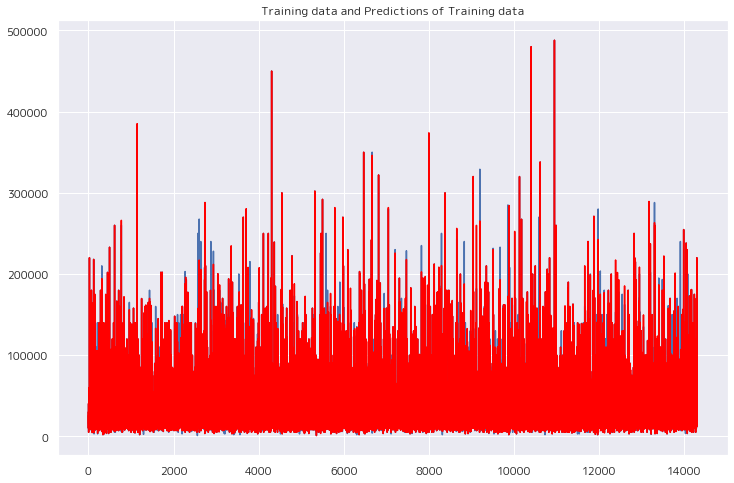

In [525]:
plt.figure(figsize=(12,8))
plt.plot(y_train.values)
plt.plot(pred_train, color='red')
plt.title("Training data and Predictions of Training data")
plt.show()

In [571]:
acc_encode = pickle.load(open("encoder/parts.pkl","rb"))
model_encode = pickle.load(open("encoder/vehicle_model.pkl","rb"))
engine_encode = pickle.load(open("encoder/engine_model.pkl","rb"))
customer_encode = pickle.load(open("encoder/customer.pkl","rb"))

In [565]:
hybrid_mean_by_month = pickle.load(open("modelCar_engineModel_by_month.pkl","rb"))

hybrid_mean_by_month_A32_VQ20DE = hybrid_mean_by_month[(hybrid_mean_by_month['Model xe_車輌型式'] == 'A32') & (hybrid_mean_by_month ['Engine model_エンジン型式'] == 'VQ20DE')]

hybrid_mean_by_month_A32_VQ20DE ['Tên phụ tùng_商品名'] = 'エンジン'
hybrid_mean_by_month_A32_VQ20DE ['Tên phụ tùng_商品名'] = acc_encode.transform(hybrid_mean_by_month_A32_VQ20DE ['Tên phụ tùng_商品名'])

hybrid_mean_by_month_A32_VQ20DE ['Model xe_車輌型式'] = model_encode.transform(hybrid_mean_by_month_A32_VQ20DE ['Model xe_車輌型式'])
hybrid_mean_by_month_A32_VQ20DE ['Engine model_エンジン型式'] = engine_encode.transform(hybrid_mean_by_month_A32_VQ20DE ['Engine model_エンジン型式'])


hybrid_mean_by_month_A32_VQ20DE ['mean'] = 38916.666667
hybrid_mean_by_month_A32_VQ20DE ['mean_auction'] = 26244.666667

hybrid_mean_by_month_A32_VQ20DE ['Tháng bán hàng_売上月']  = hybrid_mean_by_month_A32_VQ20DE['month_year'].dt.month
hybrid_mean_by_month_A32_VQ20DE ['Năm bán hàng_売上年'] = hybrid_mean_by_month_A32_VQ20DE['month_year'].dt.year

hybrid_mean_by_month_A32_VQ20DE ['Khách hàng_仕向先'] = "TORENS"
hybrid_mean_by_month_A32_VQ20DE ['Khách hàng_仕向先'] = customer_encode.transform(hybrid_mean_by_month_A32_VQ20DE ['Khách hàng_仕向先'])

hybrid_mean_by_month_A32_VQ20DE = hybrid_mean_by_month_A32_VQ20DE [['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','Thành tích bán ra_販売実績','Khách hàng_仕向先','Tháng bán hàng_売上月','mean','mean_auction','Tháng bán hàng_売上月','month_year']]
hybrid_mean_by_month_A32_VQ20DE = hybrid_mean_by_month_A32_VQ20DE.sort_values(by = ['month_year'])
hybrid_mean_by_month_A32_VQ20DE




,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Tháng bán hàng_売上月,month_year
10,0,4,477,17500.0,72,5,38916.666667,26244.666667,5,2011-05-01
18,0,4,477,25000.0,72,10,38916.666667,26244.666667,10,2011-10-01
5,0,4,477,28500.0,72,3,38916.666667,26244.666667,3,2012-03-01
11,0,4,477,30000.0,72,5,38916.666667,26244.666667,5,2012-05-01
17,0,4,477,30000.0,72,9,38916.666667,26244.666667,9,2012-09-01
20,0,4,477,23500.0,72,12,38916.666667,26244.666667,12,2013-12-01
13,0,4,477,24000.0,72,6,38916.666667,26244.666667,6,2015-06-01
6,0,4,477,40000.0,72,3,38916.666667,26244.666667,3,2016-03-01
9,0,4,477,40000.0,72,4,38916.666667,26244.666667,4,2016-04-01
15,0,4,477,40000.0,72,8,38916.666667,26244.666667,8,2016-08-01


In [660]:
hybrid_mean_by_month

,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,month_year
0,1C8F4,CHRYSLER-T,30000.0,2016-06-01
1,1GCDL19,CHEV-4G,30000.0,2017-04-01
2,1GNEL19W,CHEV-4G,35000.0,2017-10-01
3,A05A,3A90,9000.0,2019-05-01
4,A32,VQ20DE,120000.0,2020-01-01
...,...,...,...,...
14223,ZZV50,1ZZ-FE,129000.0,2018-12-01
14224,ZZW30,1ZZ-FE,85000.0,2014-04-01
14225,ZZW30,1ZZ-FE,70000.0,2016-04-01
14226,ZZW30,1ZZ-FE,80000.0,2013-06-01


In [611]:
X_test_A32_VQ20DE = hybrid_mean_by_month_A32_VQ20DE.drop(columns=['Thành tích bán ra_販売実績','month_year','mean','mean_auction'])
y_test_A32_VQ20DE = hybrid_mean_by_month_A32_VQ20DE ['Thành tích bán ra_販売実績']

# y_pred_A32_VQ20DE = model_best.predict (X_test_A32_VQ20DE)
# print(mean_absolute_percentage_error(y_test_A32_VQ20DE, y_pred_A32_VQ20DE))

# plt.figure(figsize=(12,8))
# plt.plot(y_test_A32_VQ20DE.values)
# plt.plot(y_pred_A32_VQ20DE, color='red')
# plt.title("Training data and Predictions of Training data")
# plt.show()

In [612]:
X_test_A32_VQ20DE

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Khách hàng_仕向先,Tháng bán hàng_売上月,Tháng bán hàng_売上月
10,0,4,477,72,5,5
18,0,4,477,72,10,10
5,0,4,477,72,3,3
11,0,4,477,72,5,5
17,0,4,477,72,9,9
20,0,4,477,72,12,12
13,0,4,477,72,6,6
6,0,4,477,72,3,3
9,0,4,477,72,4,4
15,0,4,477,72,8,8


In [574]:
df_A32_VQ20DE = df_best_feature[ (df_best_feature['Tên phụ tùng_商品名'] == acc_encode.transform(['エンジン'])[0]) & (df_best_feature['Model xe_車輌型式'] == model_encode.transform(['A32'])[0]) & (df_best_feature ['Engine model_エンジン型式'] == engine_encode.transform(['VQ20DE'])[0])]
df_A32_VQ20DE

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年
14202,0,4,477,40000.0,78,8,38916.666667,26244.666667,2015
14204,0,4,477,45000.0,23,4,38916.666667,26244.666667,2018
14205,0,4,477,40000.0,7,7,38916.666667,26244.666667,2018
14206,0,4,477,25000.0,3,6,38916.666667,26244.666667,2011
14208,0,4,477,25000.0,3,10,38916.666667,26244.666667,2011
14209,0,4,477,40000.0,72,8,38916.666667,26244.666667,2017
14210,0,4,477,35000.0,78,12,38916.666667,26244.666667,2017
14212,0,4,477,45000.0,37,4,38916.666667,26244.666667,2020
14213,0,4,477,45000.0,72,9,38916.666667,26244.666667,2020
14214,0,4,477,40000.0,41,6,38916.666667,26244.666667,2016


0.018385067251461988


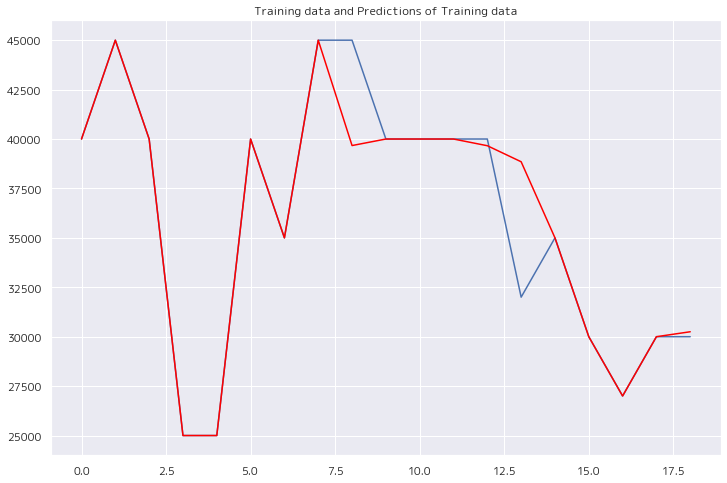

In [575]:
X_test_A32_VQ20DE = df_A32_VQ20DE.drop(columns=['Thành tích bán ra_販売実績'])
y_test_A32_VQ20DE = df_A32_VQ20DE ['Thành tích bán ra_販売実績']

y_pred_A32_VQ20DE = model_best.predict (X_test_A32_VQ20DE)
print(mean_absolute_percentage_error(y_test_A32_VQ20DE, y_pred_A32_VQ20DE))

plt.figure(figsize=(12,8))
plt.plot(y_test_A32_VQ20DE.values)
plt.plot(y_pred_A32_VQ20DE, color='red')
plt.title("Training data and Predictions of Training data")
plt.show()

# Predict by mean

In [658]:
df_group_by_month = df_best_feature.groupby(['Model xe_車輌型式','Engine model_エンジン型式','Tháng bán hàng_売上月','Năm bán hàng_売上年']).agg(mean_by_month =('Thành tích bán ra_販売実績','mean'))

In [659]:
df_group_by_month = df_group_by_month.reset_index()
# df_group_by_month.drop(columns=['index'],inplace=True)
df_group_by_month[(df_group_by_month['Model xe_車輌型式'] == model_encode.transform(['A32'])[0]) & (df_group_by_month['Engine model_エンジン型式'] == engine_encode.transform(['VQ20DE'])[0])].sort_values(by=['Năm bán hàng_売上年'])

,Model xe_車輌型式,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,mean_by_month
22,4,477,10,2011,25000.0
13,4,477,7,2011,10000.0
10,4,477,6,2011,25000.0
15,4,477,8,2012,30000.0
18,4,477,9,2012,30000.0
9,4,477,5,2012,30000.0
24,4,477,12,2013,35000.0
4,4,477,1,2013,27000.0
11,4,477,6,2014,12000.0
16,4,477,8,2015,40000.0


In [627]:
data = df_group_by_month.drop(columns=['mean_by_month'])
target = df_group_by_month['mean_by_month']

# X_train, X_test, y_train, y_test = train_test_split (data, target, test_size=0.3, random_state=42)

In [628]:
X_train, X_test, y_train, y_test = train_test_split (data, target, test_size=0.3, random_state=42)

In [629]:
X_train

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年
15538,8,1049,351,2,2020
10463,0,1388,217,10,2012
13601,1,1068,421,4,2012
1329,0,135,532,9,2012
11799,1,124,264,2,2020
...,...,...,...,...,...
13418,1,951,361,10,2018
5390,0,687,11,7,2009
860,0,79,223,11,2013
15795,8,1439,455,5,2015


In [633]:
X_test_A32_VQ20DE

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Khách hàng_仕向先,Tháng bán hàng_売上月,Tháng bán hàng_売上月
10,0,4,477,72,5,5
18,0,4,477,72,10,10
5,0,4,477,72,3,3
11,0,4,477,72,5,5
17,0,4,477,72,9,9
20,0,4,477,72,12,12
13,0,4,477,72,6,6
6,0,4,477,72,3,3
9,0,4,477,72,4,4
15,0,4,477,72,8,8


In [634]:
model  = ExtraTreesRegressor()
model.fit(X_train, y_train)


# pred = model.predict(X_test)
# mean_absolute_percentage_error(y_test,pred)*100

pred = model.predict(X_test_A32_VQ20DE.drop(columns=['Khách hàng_仕向先']))
mean_absolute_percentage_error(y_test_A32_VQ20DE,pred)*100

32.511491278354534

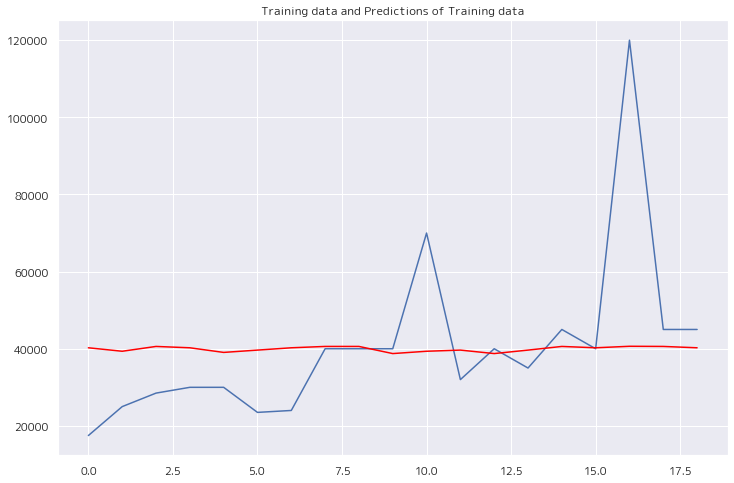

In [635]:
plt.figure(figsize=(12,8))
plt.plot(y_test_A32_VQ20DE.values)
plt.plot(pred, color='red')
plt.title("Training data and Predictions of Training data")
plt.show()

# Join with mean by month

In [2]:
df_mean_hybrid_by_month  = pickle.load(open('modelCar_engineModel_by_month.pkl','rb'))
df_mean_hybrid_by_month.rename(columns={'Thành tích bán ra_販売実績':'mean_by_month'},inplace=True)
df_mean_hybrid_by_month['Tháng bán hàng_売上月'] = df_mean_hybrid_by_month['month_year'].dt.month
df_mean_hybrid_by_month['Năm bán hàng_売上年'] = df_mean_hybrid_by_month['month_year'].dt.year
df_mean_hybrid_by_month

,Model xe_車輌型式,Engine model_エンジン型式,mean_by_month,month_year,Tháng bán hàng_売上月,Năm bán hàng_売上年
0,1C8F4,CHRYSLER-T,30000.0,2016-06-01,6,2016
1,1GCDL19,CHEV-4G,30000.0,2017-04-01,4,2017
2,1GNEL19W,CHEV-4G,35000.0,2017-10-01,10,2017
3,A05A,3A90,9000.0,2019-05-01,5,2019
4,A32,VQ20DE,120000.0,2020-01-01,1,2020
...,...,...,...,...,...,...
14223,ZZV50,1ZZ-FE,129000.0,2018-12-01,12,2018
14224,ZZW30,1ZZ-FE,85000.0,2014-04-01,4,2014
14225,ZZW30,1ZZ-FE,70000.0,2016-04-01,4,2016
14226,ZZW30,1ZZ-FE,80000.0,2013-06-01,6,2013


In [176]:
df_best_feature = df_join_two_mean[list_feature]
df_join_mean_month  = pd.merge(df_best_feature, df_mean_hybrid_by_month, on=['Model xe_車輌型式','Engine model_エンジン型式','Tháng bán hàng_売上月','Năm bán hàng_売上年'],how = 'left')
df_join_mean_month

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年,mean_by_month,month_year
0,ノーズカット（個別）,ES9,LDA-MF5,12000.0,SARRANSINGH'S AUTO LTD,3,12000.000000,NaN,2016,NaN,NaT
1,エンジン,AT211,7A-FE,30000.0,木戸クンク・ジャイブ,2,39556.053812,50511.400000,2015,25000.0,2015-02-01
2,ノーズカット（個別）,AT211,7A-FE,10000.0,木戸クンク・ジャイブ,2,39556.053812,50511.400000,2015,25000.0,2015-02-01
3,エンジン,AT211,7A-FE,30000.0,NaN,8,39556.053812,50511.400000,2015,33000.0,2015-08-01
4,エンジン,AT211,7A-FE,33000.0,NaN,7,39556.053812,50511.400000,2015,31000.0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...
20423,エンジン,JLR50,VG33E,40000.0,西野 仮予約,2,40000.000000,2000.000000,2013,NaN,NaT
20424,Ｆアクスル（生/Ｄ）,SKF2V,RF-T EFI,3500.0,FADEEV EVGENY,5,3500.000000,40017.000000,2020,NaN,NaT
20425,フロントアクスル（個別）,SKF2MN,RF,2000.0,木戸クンク・ジャイブ,3,3500.000000,39032.833333,2019,NaN,NaT
20426,Ｒアクスル（生/Ｄ）,SKF2MN,RF,5000.0,木戸クンク・ジャイブ,3,3500.000000,39032.833333,2019,NaN,NaT


In [177]:
for col in df_join_mean_month.columns[df_join_mean_month.dtypes == object]:
    print(col, df_join_mean_month[col].nunique())
    df_join_mean_month[col] = df_join_mean_month[col].fillna("unknown")
    df_join_mean_month[col] = le.fit_transform(df_join_mean_month[col].values)

for col in df_join_mean_month.columns[df_join_mean_month.dtypes == 'float64']:
    df_join_mean_month.fillna(df_join_mean_month[col].mean(), inplace=True)
    df_join_mean_month.fillna(df_join_mean_month[col].mean(), inplace=True)

Tên phụ tùng_商品名 12
Model xe_車輌型式 1587
Engine model_エンジン型式 536
Khách hàng_仕向先 102


In [485]:
target = df_join_mean_month['Thành tích bán ra_販売実績']
data = df_join_mean_month.drop(columns=['Thành tích bán ra_販売実績','mean','month_year'])

In [486]:
X_train, X_test, y_train, y_test =  train_test_split(data, target, test_size= 0.3, random_state=42)


In [487]:
X_train

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Khách hàng_仕向先,Tháng bán hàng_売上月,mean_auction,Năm bán hàng_売上年,mean_by_month
7417,0,253,111,3,8,23013.000000,2012,37275.735779
5118,0,782,377,100,6,13344.000000,2014,40000.000000
2231,0,446,372,8,6,12290.578512,2018,20000.000000
6309,0,1241,71,4,9,38993.911765,2020,37275.735779
18453,0,424,329,72,6,16380.000000,2017,37275.735779
...,...,...,...,...,...,...,...,...
11284,0,1461,419,23,3,30935.400000,2016,25000.000000
11964,0,908,23,23,12,73238.990431,2017,30000.000000
5390,0,45,228,95,4,32195.943548,2021,20000.000000
860,0,125,269,3,2,32830.500000,2012,20000.000000


In [492]:
rmse = []
mape = []
r_squared = []
for  model in models:
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print(mape_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

25.904814423697605
25.8449250814514
11.878798992065098
12.815412270022897
18.117344663716448
18.238018031214718


# Using Time Series

In [3]:
df_mean_hybrid_by_month

,Model xe_車輌型式,Engine model_エンジン型式,mean_by_month,month_year,Tháng bán hàng_売上月,Năm bán hàng_売上年
0,1C8F4,CHRYSLER-T,30000.0,2016-06-01,6,2016
1,1GCDL19,CHEV-4G,30000.0,2017-04-01,4,2017
2,1GNEL19W,CHEV-4G,35000.0,2017-10-01,10,2017
3,A05A,3A90,9000.0,2019-05-01,5,2019
4,A32,VQ20DE,120000.0,2020-01-01,1,2020
...,...,...,...,...,...,...
14223,ZZV50,1ZZ-FE,129000.0,2018-12-01,12,2018
14224,ZZW30,1ZZ-FE,85000.0,2014-04-01,4,2014
14225,ZZW30,1ZZ-FE,70000.0,2016-04-01,4,2016
14226,ZZW30,1ZZ-FE,80000.0,2013-06-01,6,2013


In [4]:
df_mean_hybrid_by_month = df_mean_hybrid_by_month.sort_values(by=['month_year'])
df_mean_hybrid_by_month

,Model xe_車輌型式,Engine model_エンジン型式,mean_by_month,month_year,Tháng bán hàng_売上月,Năm bán hàng_売上年
11720,ST215,3S-GE,30000.0,2009-01-01,1,2009
12700,UBS69GW,4JG2-T,100000.0,2009-01-01,1,2009
12021,SXM10,3S-FE,28000.0,2009-01-01,1,2009
2655,CR52,3C,70000.0,2009-01-01,1,2009
482,AE111,4A-GE,60000.0,2009-02-01,2,2009
...,...,...,...,...,...,...
3131,DC5W,ZY-VE,22000.0,2021-07-01,7,2021
10574,SCP11,1SZ-FE,130000.0,2021-07-01,7,2021
8599,NCP60,2NZ-FE,147900.0,2021-07-01,7,2021
519,AE114,4A-FE,193600.0,2021-07-01,7,2021


In [6]:
df_count = df_mean_hybrid_by_month.groupby(['Model xe_車輌型式','Engine model_エンジン型式'])['mean_by_month'].count().reset_index(name = 'count')
df_count = df_count.sort_values(by = ['count'], ascending = False)
df_count[df_count['count'] > 50]

,Model xe_車輌型式,Engine model_エンジン型式,count
635,GX100,1G-FE,102
81,AT211,7A-FE,92
91,AZ10,CGA3-DE,89
843,K11,CG10DE,83
449,EXZ10,5E-FE,81
522,GD1,L13A,80
50,AK12,CR12DE,78
1249,RA6,F23A,74
1500,SXM15,3S-FE,71
808,JZS151,1JZ-GE,69


In [233]:
list_much_count_model = ['GX100','AT211','AZ10','K11','EXZ10']
list_much_count_engine = ['1G-FE','7A-FE','CGA3-DE','CG10DE', '5E-FE']  

In [414]:
for model, engine in zip(list_much_count_model, list_much_count_engine ):
    
    globals()[f'df_{model}_{engine.replace("-","")}'] = df_best_feature[(df_best_feature ['Model xe_車輌型式'] == model) & (df_best_feature['Engine model_エンジン型式'] == engine)]
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time'] =  globals()[f'df_{model}_{engine.replace("-","")}']['Tháng bán hàng_売上月'].astype(str)  + "/" + globals()[f'df_{model}_{engine.replace("-","")}']['Năm bán hàng_売上年'].astype(str)
    globals()[f'df_{model}_{engine.replace("-","")}']['date_time']  = pd.to_datetime(globals()[f'df_{model}_{engine.replace("-","")}']['date_time'], format= "%m/%Y")
    globals()[f'df_{model}_{engine.replace("-","")}'] = globals()[f'df_{model}_{engine.replace("-","")}'].sort_values(by = ['date_time'])
    globals()[f'df_{model}_{engine.replace("-","")}_mean_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Thành tích bán ra_販売実績'].mean()
    globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'] = globals()[f'df_{model}_{engine.replace("-","")}'].groupby(['date_time'])['Thành tích bán ra_販売実績'].sum()

In [242]:
df_GX100_1GFE_sum_by_month

date_time
2009-02-01     35000.0
2010-04-01     35000.0
2010-05-01      8000.0
2010-07-01     53000.0
2010-08-01     28000.0
                ...   
2020-02-01    210000.0
2020-10-01    140000.0
2021-03-01    195000.0
2021-04-01     12000.0
2021-06-01    389000.0
Name: Thành tích bán ra_販売実績, Length: 100, dtype: float64

predicted=69757.534378, expected=96000.000000
predicted=76059.429448, expected=128000.000000
predicted=127403.975413, expected=100000.000000
predicted=105361.539971, expected=220000.000000
predicted=160848.147538, expected=70000.000000
predicted=120674.407437, expected=98000.000000
predicted=150637.902330, expected=28000.000000
predicted=63491.212213, expected=129000.000000
predicted=90220.617101, expected=10000.000000
predicted=55214.849017, expected=30000.000000
predicted=61243.204689, expected=115000.000000
predicted=49711.837232, expected=35000.000000
predicted=57033.062867, expected=35000.000000
predicted=68152.441694, expected=35000.000000
predicted=35000.000014, expected=80000.000000
predicted=50032.801359, expected=358000.000000
predicted=172735.303187, expected=195000.000000
predicted=199455.033451, expected=448000.000000
predicted=327378.217532, expected=293000.000000
predicted=351944.198596, expected=314000.000000
predicted=338042.495587, expected=255000.000000
predicted=292

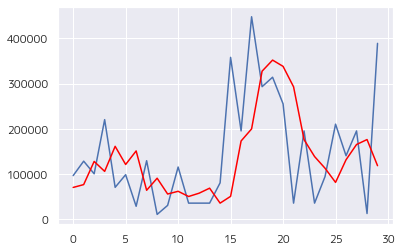

In [246]:
# X = np.log(df_GX100_1GFE_sum_by_month).values
X = df_GX100_1GFE_sum_by_month.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

rmse = mean_squared_error(test, predictions,squared=False)
mape = mean_absolute_percentage_error(test, predictions)

# rmse = mean_squared_error(np.exp(test), np.exp(predictions),squared=False)
# mape = mean_absolute_percentage_error(np.exp(test), np.exp(predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

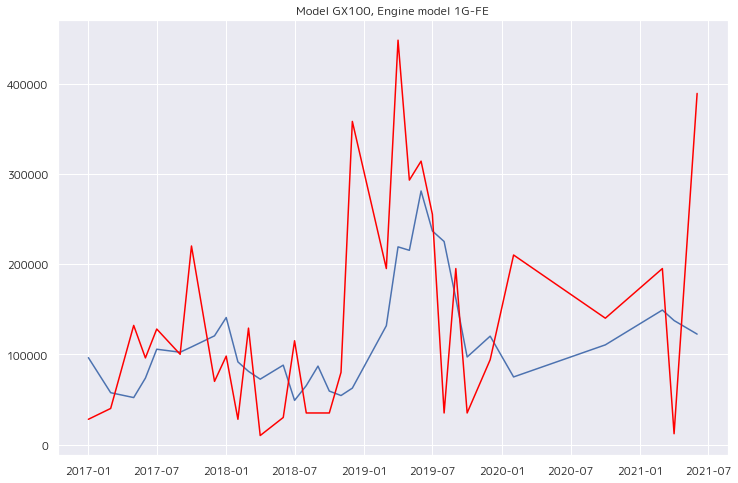

RMSE: 103435.992
MAPE: 1.282




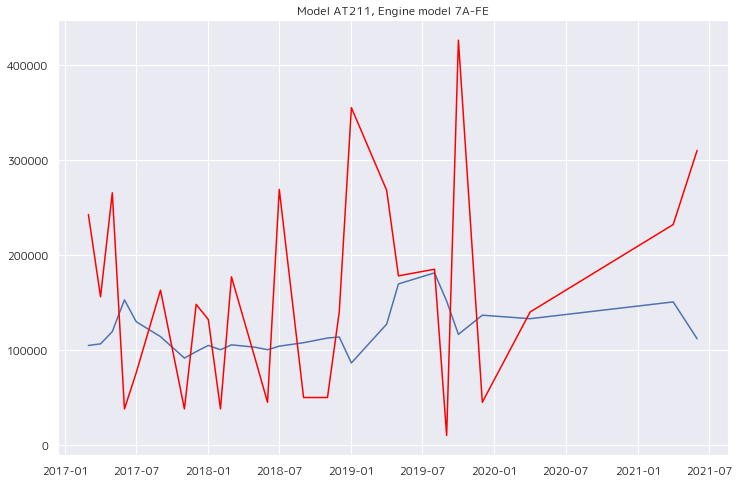

RMSE: 118146.784
MAPE: 1.234




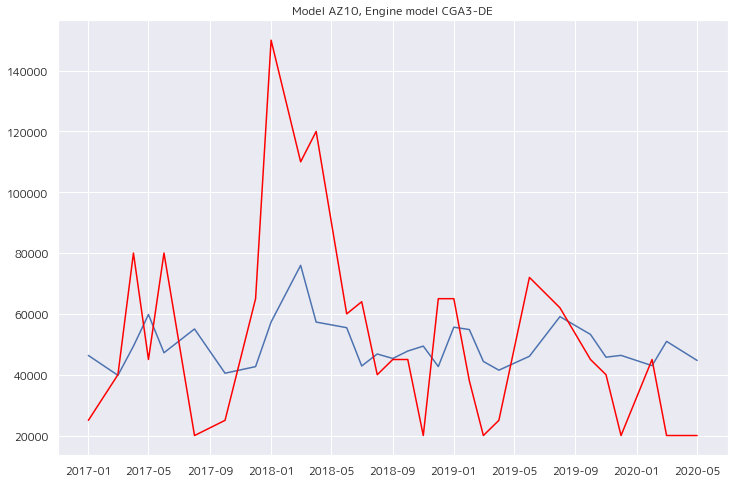

RMSE: 28576.631
MAPE: 0.532




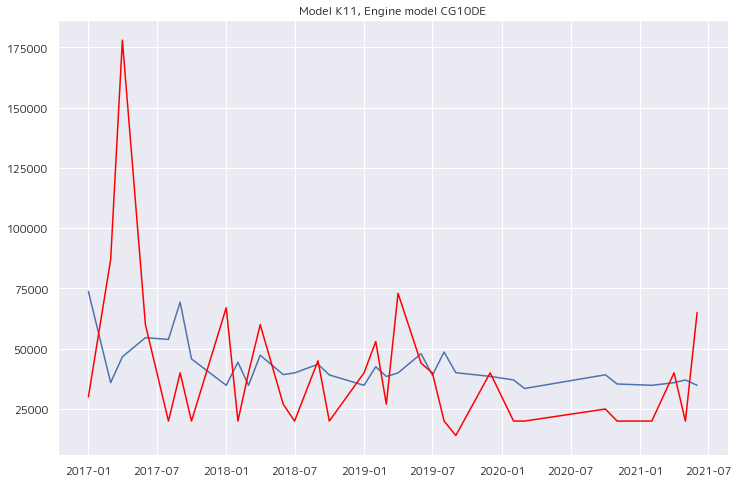

RMSE: 31840.987
MAPE: 0.649




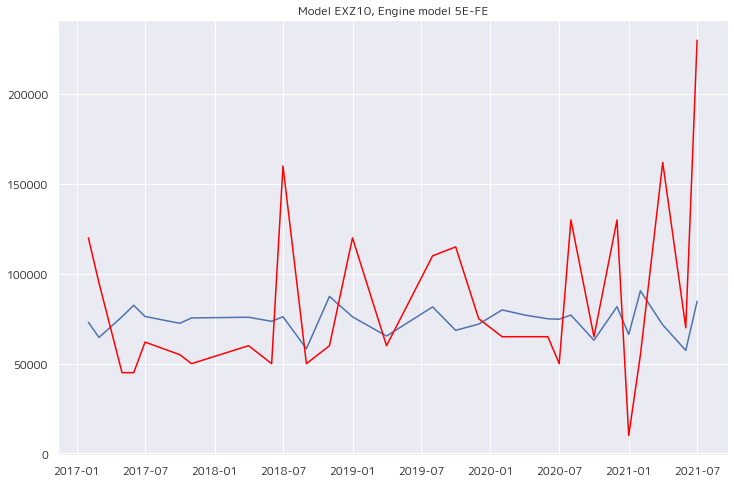

RMSE: 45623.180
MAPE: 0.547




In [264]:
for model, engine in zip(list_much_count_model, list_much_count_engine):
    
    X = globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'].values
    size = int(len(X) * 0.7)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]

    
    model_arima = ARIMA(globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'], order=(3,0,0))
    results = model_arima.fit()
    pred = results.predict(start='2017-01', dynamic=False)
    y_forecasted = pred
    y_truth = globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month']['2017-01-01':]
    rmse = mean_squared_error(y_truth, y_forecasted,squared=False)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    # plot forecasts against actual outcomes
    plt.figure(figsize=(12,8))
    plt.plot(y_forecasted)
    plt.plot(y_truth, color='red')
    plt.title("Model {0}, Engine model {1}".format(model, engine))
    plt.show()
    print('RMSE: %.3f' % rmse)
    print('MAPE: %.3f' % mape)
    print("\n")

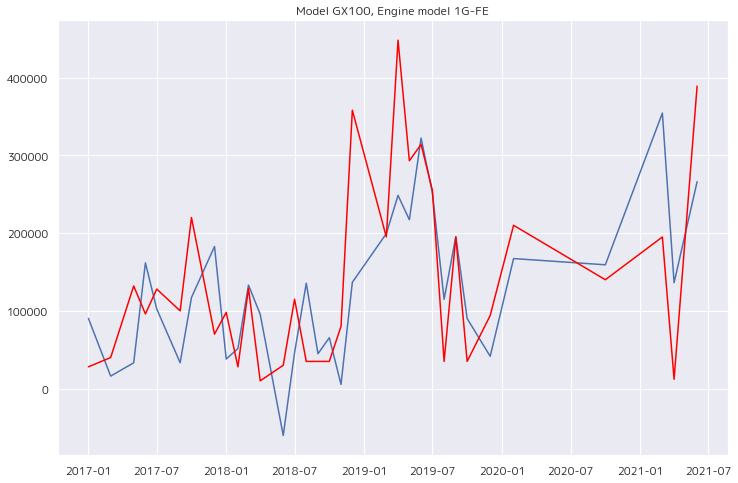

RMSE: 87544.300
MAPE: 1.316




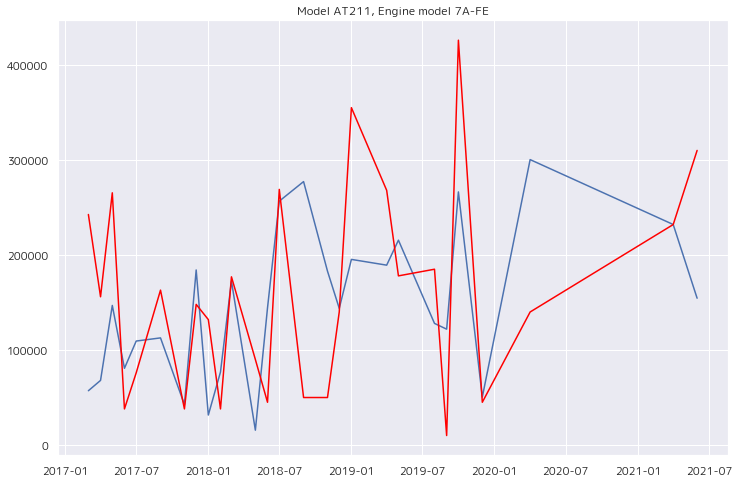

RMSE: 102517.664
MAPE: 1.138




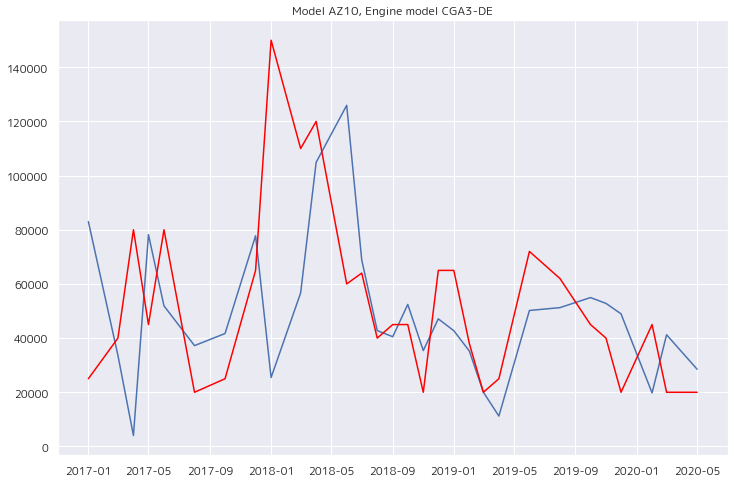

RMSE: 36033.813
MAPE: 0.524




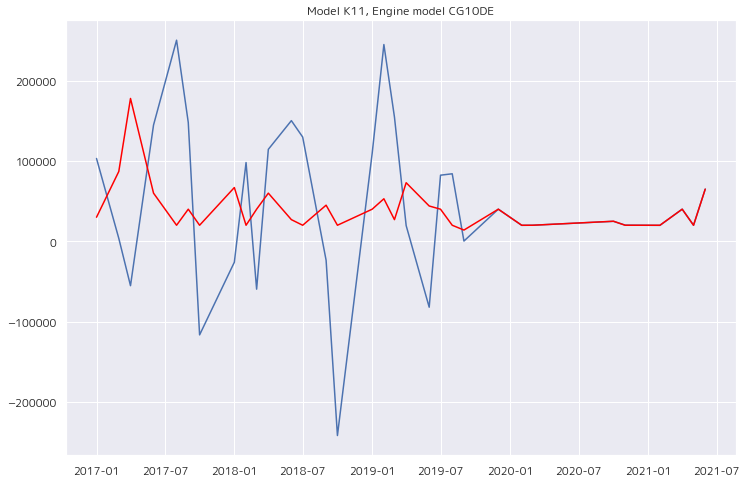

RMSE: 107357.910
MAPE: 2.486




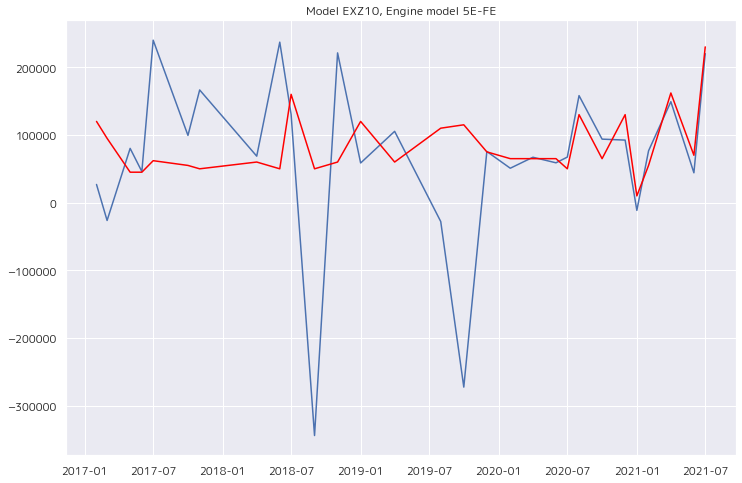

RMSE: 127207.140
MAPE: 1.174




In [267]:

for model, engine in zip(list_much_count_model, list_much_count_engine):
    

    
    model_sarimax =SARIMAX(globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'],
                                order=(5, 0, 0),
                                seasonal_order=(5, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = model_sarimax.fit()
    
    pred = results.predict(start='2017-01', dynamic=False)
    y_forecasted = pred
    y_truth = globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month']['2017-01-01':]
    rmse = mean_squared_error(y_truth, y_forecasted,squared=False)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    # plot forecasts against actual outcomes
    plt.figure(figsize=(12,8))
    plt.plot(y_forecasted)
    plt.plot(y_truth, color='red')
    plt.title("Model {0}, Engine model {1}".format(model, engine))
    plt.show()
    print('RMSE: %.3f' % rmse)
    print('MAPE: %.3f' % mape)
    print("\n")

# Using LSTM

In [321]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

Lenght test: 30
Lenght test X: 28


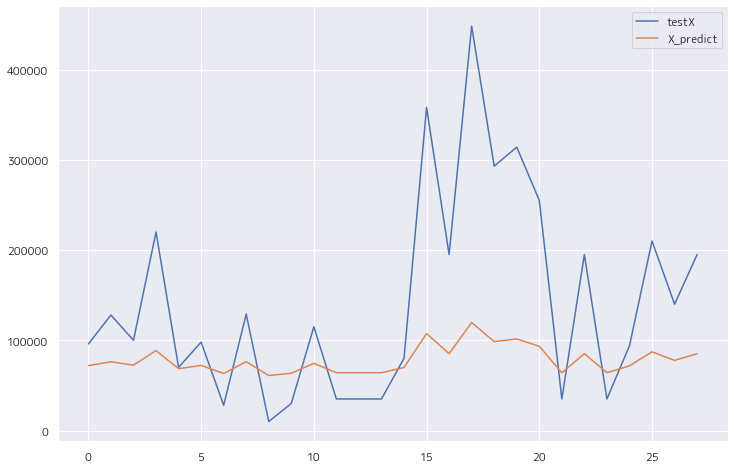

Train MAPE: 1.14 MAPE
Test MAPE: 1.10 MAPE
Train Score: 41820.17 RMSE
Test Score: 124179.93 RMSE
Lenght test: 28
Lenght test X: 26


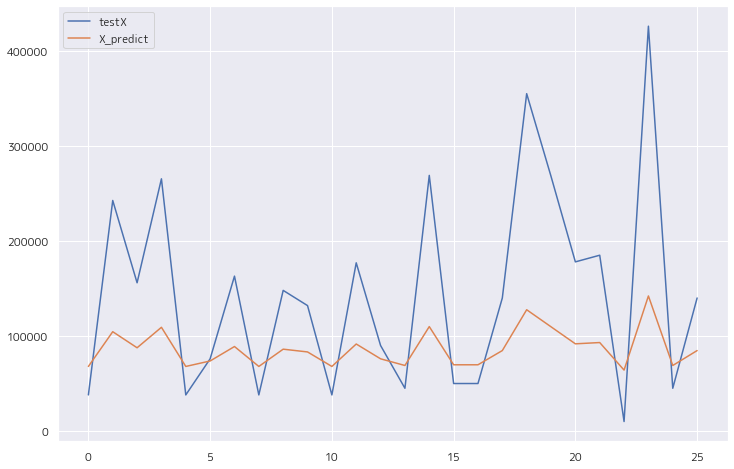

Train MAPE: 0.98 MAPE
Test MAPE: 1.02 MAPE
Train Score: 48769.48 RMSE
Test Score: 129043.58 RMSE
Lenght test: 25
Lenght test X: 23


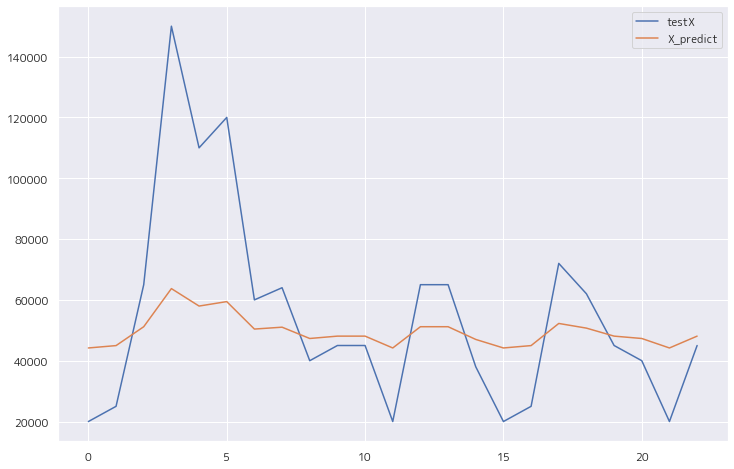

Train MAPE: 0.70 MAPE
Test MAPE: 0.49 MAPE
Train Score: 34356.05 RMSE
Test Score: 30919.99 RMSE
Lenght test: 23
Lenght test X: 21


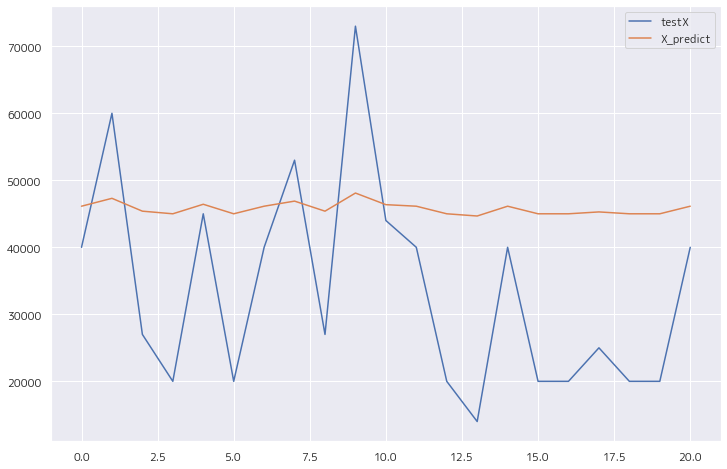

Train MAPE: 0.87 MAPE
Test MAPE: 0.77 MAPE
Train Score: 39718.07 RMSE
Test Score: 20215.58 RMSE
Lenght test: 24
Lenght test X: 22


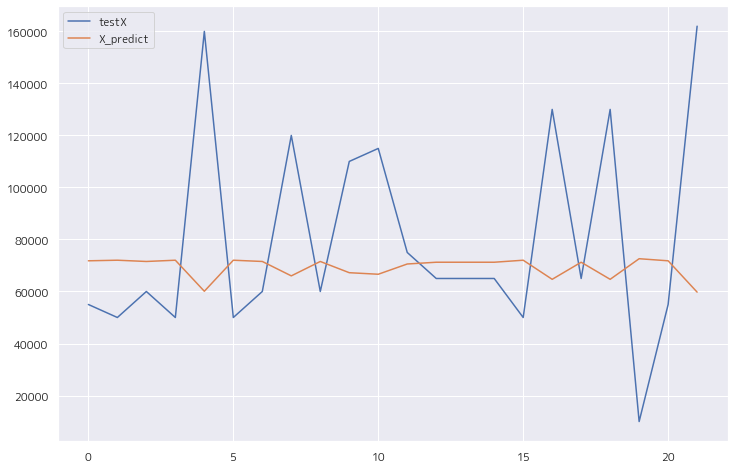

Train MAPE: 0.83 MAPE
Test MAPE: 0.52 MAPE
Train Score: 43349.40 RMSE
Test Score: 39428.70 RMSE


In [393]:
for model, engine in zip(list_much_count_model, list_much_count_engine):
    
    globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'].values.reshape(globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'].shape)
    dataset = mms.fit_transform (globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'].values.reshape(globals()[f'df_{model}_{engine.replace("-","")}_sum_by_month'].shape[0],1))
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    print("Lenght test:", len(test))
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    print("Lenght test X:", len(testX))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=0)

    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = mms.inverse_transform(trainPredict)
    trainY = mms.inverse_transform([trainY])
    testPredict = mms.inverse_transform(testPredict)
    testY = mms.inverse_transform([testY])

    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.figure(figsize=(12,8))
#     plt.plot(mms.inverse_transform(train))
#     plt.plot(trainPredictPlot)
#     plt.plot(mms.inverse_transform(testX))
    plt.plot(mms.inverse_transform(testX.reshape(testX.shape[0],testX.shape[1])))
#     plt.plot(mms.inverse_transform(dataset))
#     plt.plot(trainPredictPlot)
    plt.plot(testPredict)
    plt.legend(["testX","X_predict"],loc = "best")
#     plt.legend(["testX"],loc = "best")
    plt.show()

    # calculate root mean squared error
    trainMAPE = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
    print('Train MAPE: %.2f MAPE' % (trainMAPE))
    testMAPE = mean_absolute_percentage_error(testY[0], testPredict[:,0])
    print('Test MAPE: %.2f MAPE' % (testMAPE))

    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

# Multivariate Time Series

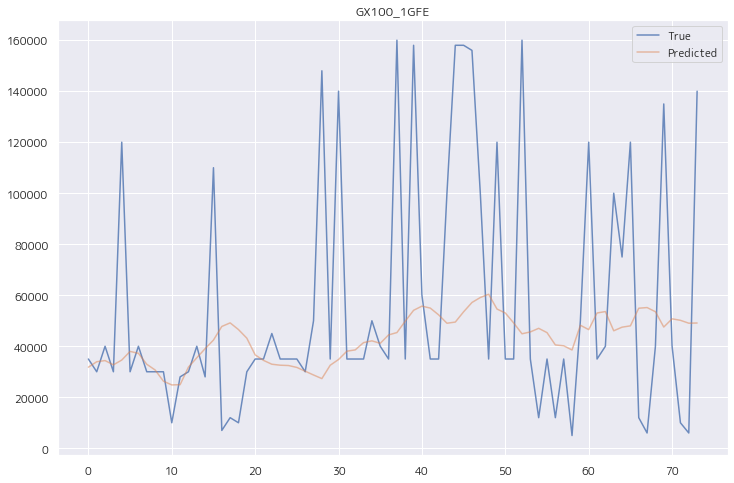

RMSE:  47338.848
MAPE:  0.9509992




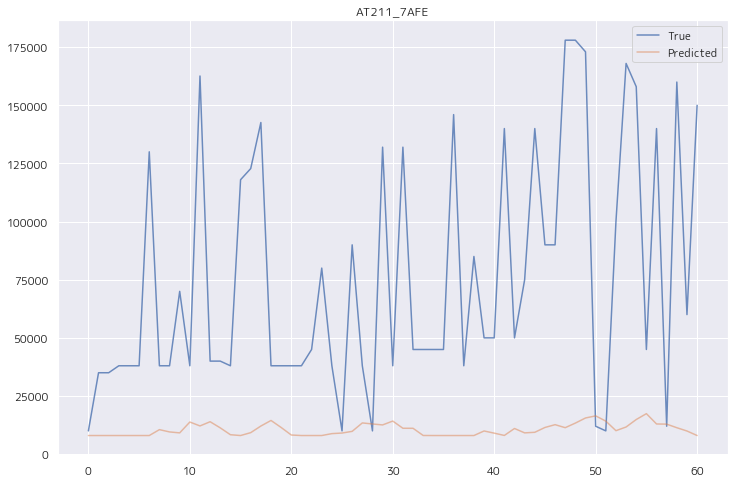

RMSE:  82991.16
MAPE:  0.7701165




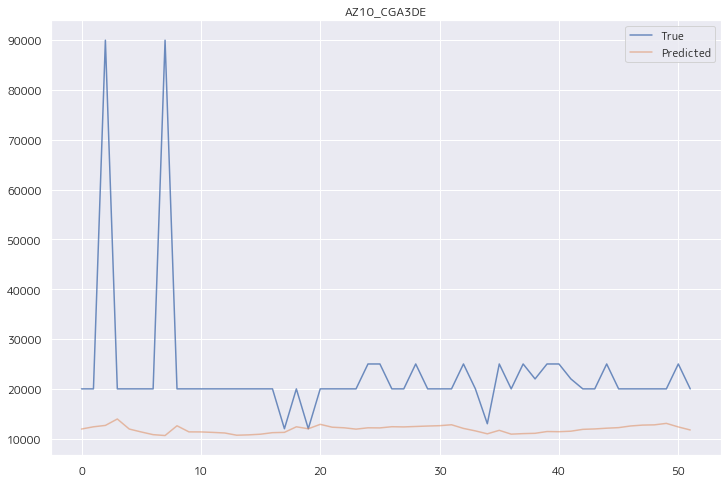

RMSE:  17814.637
MAPE:  0.42693478




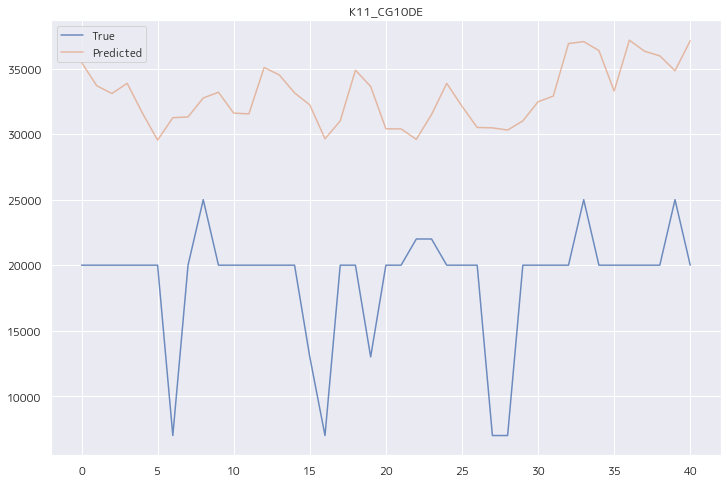

RMSE:  14763.805
MAPE:  0.9376972




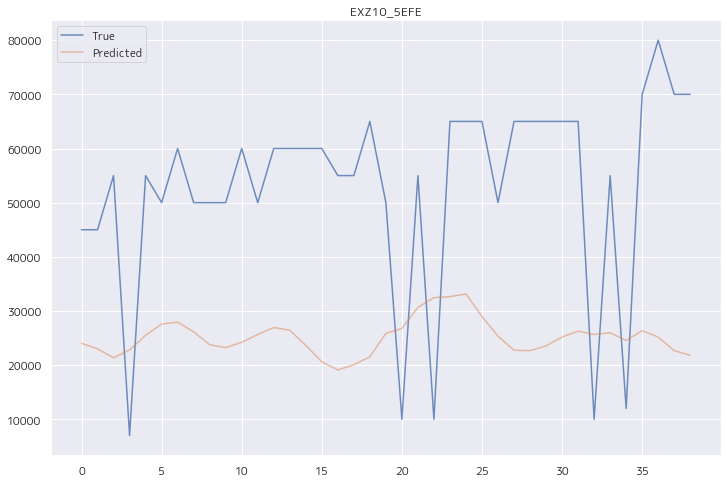

RMSE:  33228.54
MAPE:  0.7213935




In [418]:
for model, engine in zip(list_much_count_model, list_much_count_engine):
    for col in globals()[f'df_{model}_{engine.replace("-","")}'].columns[globals()[f'df_{model}_{engine.replace("-","")}'].dtypes == object]:
#         print(col, globals()[f'df_{model}_{engine.replace("-","")}'][col].nunique())
        globals()[f'df_{model}_{engine.replace("-","")}'][col] = globals()[f'df_{model}_{engine.replace("-","")}'][col].fillna("unknown")
        globals()[f'df_{model}_{engine.replace("-","")}'][col] = le.fit_transform(globals()[f'df_{model}_{engine.replace("-","")}'][col].values)

    for col in globals()[f'df_{model}_{engine.replace("-","")}'].columns[globals()[f'df_{model}_{engine.replace("-","")}'].dtypes == 'float64']:
    #     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
          globals()[f'df_{model}_{engine.replace("-","")}'].fillna(0, inplace=True)
        
    df = globals()[f'df_{model}_{engine.replace("-","")}'].copy()
    df['y-lag1'] = df['Thành tích bán ra_販売実績'].shift(1)
    df.dropna(axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    df.drop(['Model xe_車輌型式', 'Engine model_エンジン型式', 'mean', 'mean_auction', 'date_time'], axis = 1, inplace = True)
    
    X = df.drop('Thành tích bán ra_販売実績', axis = 1)
    X = X.values
    y = df['Thành tích bán ra_販売実績'].values
    
    # Split Train and Test data temporally
    test_size = 0.3
    cutoff = int(X.shape[0] * (1 - test_size))
    X_train, y_train = X[ :cutoff , : ], y[ :cutoff ]
    X_test, y_test = X[ cutoff: , : ], y[ cutoff: ]
    del X, y
    
    x_scaler = MinMaxScaler()
    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)

    y_min, y_max = np.min(y_train), np.max(y_train)
    y_train = (y_train - y_min) / (y_max - y_min)
    y_test = (y_test - y_min) / (y_max - y_min)
    
    len_input = 5
    no_vars = X_train.shape[1]
    X_train, y_train = RNN_regprep(X_train, y_train, len_input, len_pred = 1)
    X_test, y_test = RNN_regprep(X_test, y_test, len_input, len_pred = 1)
    
    RNN = Sequential([ 
    
    LSTM(50, input_shape = (len_input, no_vars)), 
    
    Dense(1, activation = relu)
    
])

#     RNN.summary()
    
    
        # Choose no. cycles, epochs, batch size
    n_epochs = 7
    batch_size = 70
    iterations = X_train.shape[0] // batch_size

    # MAE works better than MSE in the [0, 1] range
    loss = tf.keras.losses.MeanAbsoluteError()

    optimizer = tf.optimizers.Adam(learning_rate = 0.0005)

    loss_history = []


    @tf.function
    def train_model_on_batch():
        start = epoch * batch_size
        X_batch = X_train[start:start+batch_size, :, :]
        y_batch = y_train[start:start+batch_size, :]

        with tf.GradientTape() as tape:
            current_loss = loss(RNN(X_batch), y_batch)
        gradients = tape.gradient(current_loss, RNN.trainable_variables)
        optimizer.apply_gradients(zip(gradients, RNN.trainable_variables))
        return current_loss


    for epoch in range(n_epochs+1):
        X_train, y_train = shuffle(X_train, y_train)

        for iteration in range(iterations):
            current_loss = train_model_on_batch()

        if epoch % 1 == 0:
            loss_history.append(current_loss.numpy())
#             print("{}.   \t\tLoss: {}".format(
#                 epoch, loss_history[-1]))
    
    # Generate prediction on test data
    P_test = RNN.predict(X_test)

    # Revert scaling of y and prediction
    y_test = y_test * (y_max - y_min) + y_min
    P_test = P_test * (y_max - y_min) + y_min

    # Reshape to 2D for visualization
    y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))
    P_test = P_test.reshape((P_test.shape[0], P_test.shape[1]))
    
    plt.figure(figsize = (12, 8))
    plt.plot(y_test, label = 'True', alpha = 0.8)
    plt.plot(P_test, label = 'Predicted', alpha = 0.5)
    plt.title(f'{model}_{engine.replace("-","")}')
    plt.legend()
    plt.show()
    
    print("RMSE: ",np.sqrt(mean_squared_error(y_test, P_test)))
    print("MAPE: ",mean_absolute_percentage_error(y_test, P_test))
    print("\n")

In [425]:
for col in df.columns:
    print(col,df[col].nunique())

Vị trí_ロケーション 3
Ngày sản xuất_生産日 31
Tháng sản xuất_生産月 12
Năm sản xuất_生産年 13
Nv sản xuất_生産担当者 46
Số nhập kho_入庫番号 18377
Nguồn nhập hàng_仕入先 2852
Mã loại phụ tùng_商品コード 12
Tên phụ tùng_商品名 12
Số nhập kho(phụ tùng)_入庫番号 (部品) 20428
Tên xe_車名 496
Model xe_車輌型式 1587
Engine model_エンジン型式 536
Số lượng_数量_PARTS 1
Tổng giá nhập_仕入合計 10433
Số phút công_標準工数 12
Kết quả_生産高 13
Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額 163
Ước tính giá bán ra tại thời điểm sản xuất_生産時販売予測額 528
Số lượng bán ra_販売数量 7
Thành tích bán ra_販売実績 436
Khách hàng_仕向先 102
Truyền động 1_駆動1 4
TM_TM 3
Truyền động 2_駆動2 3
Chi tiết_詳細 2235
Số km đã chạy_走行距離 914
Năm sản xuất_年式 58
Tình trạng engine_エンジン状態 0
Rank_ランク 12
Loại xe_車種 8
Tình trạng sản xuất_未生産 1
Ước tính giá bán ra tại thời điểm nhập hàng_仕入時販売予測額.1 162
Số chỉ định loại_型式指定番号 326
Số phân loại danh mục_類別区分番号 156
Đơn giá mua_仕入単価 10423
Nhà sản xuất_メーカー 27
Giờ làm việc_工数 11
Số lượng_数量_OUT 1
Đơn giá bán hàng_売上単価 390
Sản lượng bán ra_売上金額 390
Ngày bán h

# Model Car + Engine Model + customser

In [474]:
df_best_feature['date_time']  = df_best_feature['Tháng bán hàng_売上月'].astype(str) + "/" +df_best_feature['Năm bán hàng_売上年'].astype(str)
df_best_feature['date_time'] = pd.to_datetime (df_best_feature['date_time'], format="%m/%Y")
df_best_feature = df_best_feature.sort_values (by=['date_time'])
df_best_feature

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年,date_time
12077,0,1221,73,30000.0,28,1,35406.250000,28615.666667,2009,2009-01-01
19827,9,326,140,60000.0,23,2,50833.333333,174156.000000,2009,2009-02-01
19820,0,865,99,32000.0,23,2,34142.857143,56500.000000,2009,2009-02-01
19819,8,1391,456,230000.0,28,2,230000.000000,0.000000,2009,2009-02-01
15176,0,863,118,25000.0,23,2,55000.000000,0.000000,2009,2009-02-01
...,...,...,...,...,...,...,...,...,...,...
3484,0,19,31,100000.0,52,7,88959.595960,88858.739300,2021,2021-07-01
3487,0,19,31,100000.0,52,7,88959.595960,88858.739300,2021,2021-07-01
7252,0,1262,421,45000.0,23,7,31008.860759,27410.402985,2021,2021-07-01
7108,0,522,3,55000.0,23,7,28957.142857,38124.333333,2021,2021-07-01


(2043, 9)


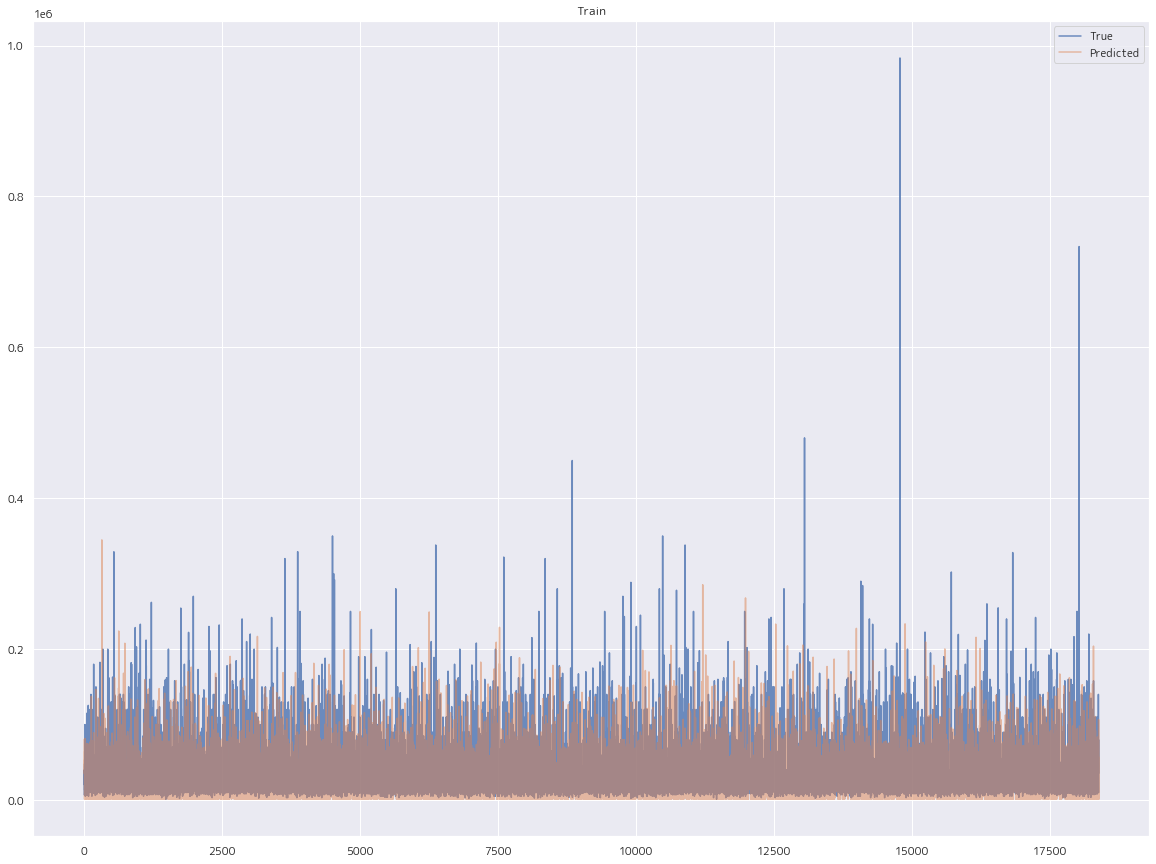

RMSE:  42904.332
MAPE:  1.2508185




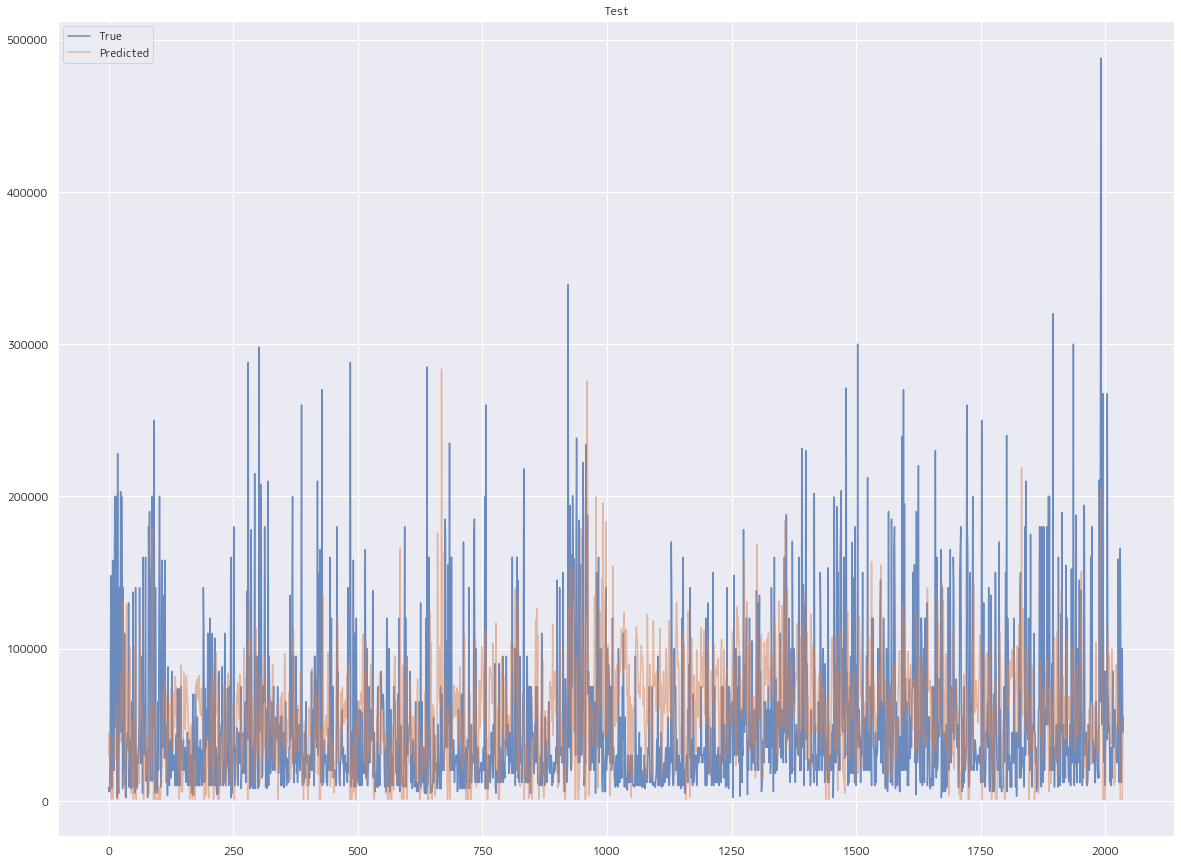

RMSE:  62125.62
MAPE:  1.9650475




In [477]:
df = df_best_feature.copy()

df['y-lag1'] = df['Thành tích bán ra_販売実績'].shift(1)
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.drop(['date_time'], axis = 1, inplace = True)

X = df.drop('Thành tích bán ra_販売実績', axis = 1)
X = X.values
y = df['Thành tích bán ra_販売実績'].values

# Split Train and Test data temporally
test_size = 0.1
cutoff = int(X.shape[0] * (1 - test_size))
X_train, y_train = X[ :cutoff , : ], y[ :cutoff ]
X_test, y_test = X[ cutoff: , : ], y[ cutoff: ]

print(X_test.shape)
del X, y

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_min, y_max = np.min(y_train), np.max(y_train)
y_train = (y_train - y_min) / (y_max - y_min)
y_test = (y_test - y_min) / (y_max - y_min)

len_input = 5
no_vars = X_train.shape[1]
X_train, y_train = RNN_regprep(X_train, y_train, len_input, len_pred = 1)
X_test, y_test = RNN_regprep(X_test, y_test, len_input, len_pred = 1)

RNN = Sequential([ 

LSTM(50, input_shape = (len_input, no_vars)), 

Dense(1, activation = relu)

])

#     RNN.summary()


    # Choose no. cycles, epochs, batch size
n_epochs = 7
batch_size = 70
iterations = X_train.shape[0] // batch_size

# MAE works better than MSE in the [0, 1] range
loss = tf.keras.losses.MeanAbsoluteError()

optimizer = tf.optimizers.Adam(learning_rate = 0.0005)

loss_history = []


@tf.function
def train_model_on_batch():
    start = epoch * batch_size
    X_batch = X_train[start:start+batch_size, :, :]
    y_batch = y_train[start:start+batch_size, :]

    with tf.GradientTape() as tape:
        current_loss = loss(RNN(X_batch), y_batch)
    gradients = tape.gradient(current_loss, RNN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, RNN.trainable_variables))
    return current_loss


for epoch in range(n_epochs+1):
    X_train, y_train = shuffle(X_train, y_train)

    for iteration in range(iterations):
        current_loss = train_model_on_batch()

    if epoch % 1 == 0:
        loss_history.append(current_loss.numpy())
#             print("{}.   \t\tLoss: {}".format(
#                 epoch, loss_history[-1]))

# Generate prediction on test data
P_test = RNN.predict(X_test)
P_train = RNN.predict(X_train)

# Revert scaling of y and prediction
y_train = y_train * (y_max - y_min) + y_min
P_train = P_train * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
P_train = P_train.reshape((P_train.shape[0], P_train.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_train, label = 'True', alpha = 0.8)
plt.plot(P_train, label = 'Predicted', alpha = 0.5)
plt.title('Train')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_train, P_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train, P_train))
print("\n")


# Revert scaling of y and prediction
y_test = y_test * (y_max - y_min) + y_min
P_test = P_test * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))
P_test = P_test.reshape((P_test.shape[0], P_test.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_test, label = 'True', alpha = 0.8)
plt.plot(P_test, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_test, P_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, P_test))
print("\n")

In [479]:
RNN.save("LSTM_modelCar_engineModel.h5")

# Model Car + Engine Model

(2043, 8)


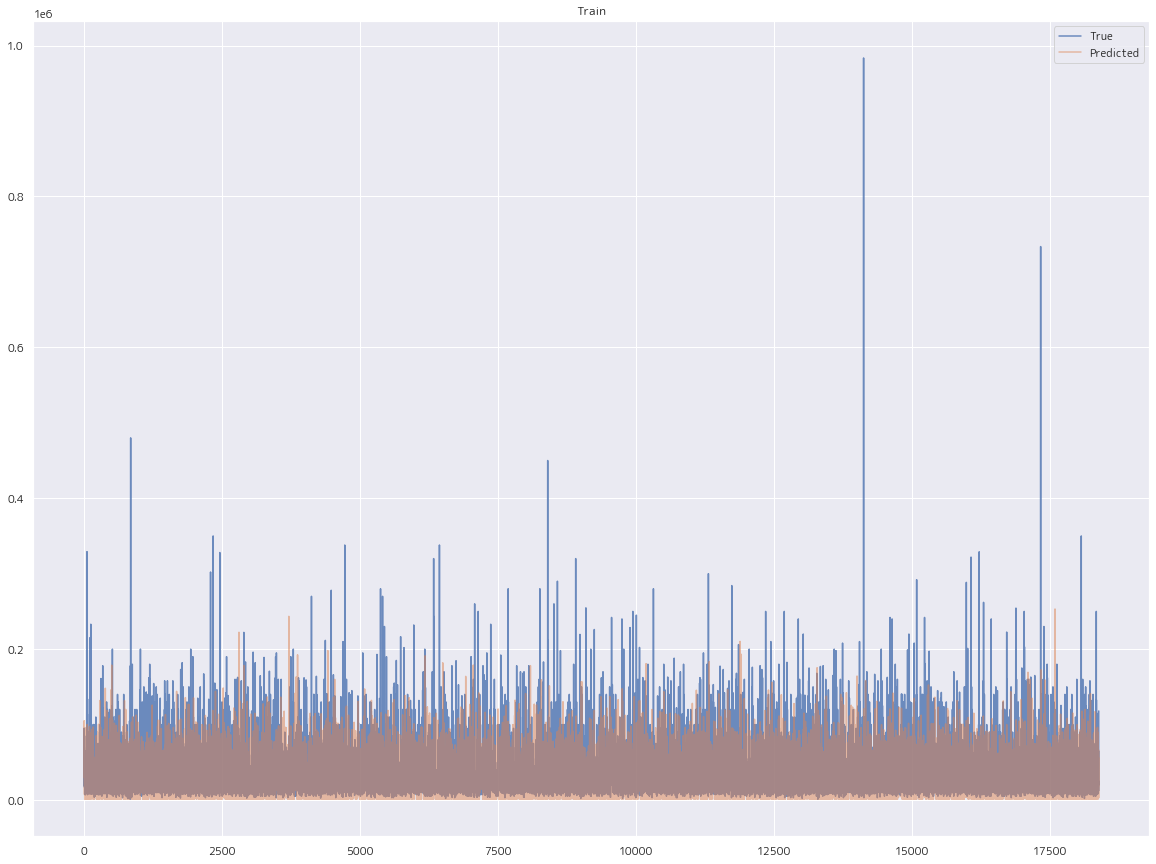

RMSE:  41414.188
MAPE:  1.191907




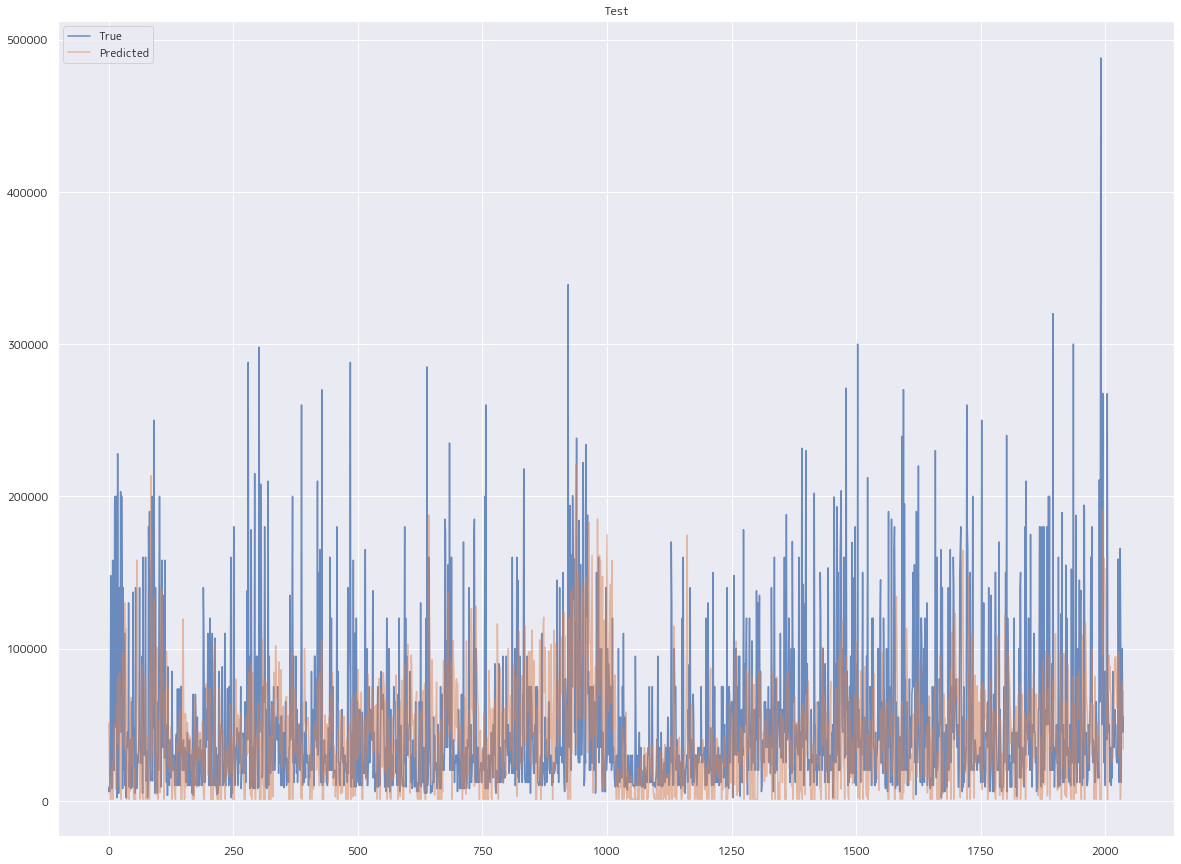

RMSE:  61624.375
MAPE:  1.5355808




In [480]:
df = df_best_feature.copy()

df['y-lag1'] = df['Thành tích bán ra_販売実績'].shift(1)
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.drop(['date_time','Khách hàng_仕向先'], axis = 1, inplace = True)

X = df.drop('Thành tích bán ra_販売実績', axis = 1)
X = X.values
y = df['Thành tích bán ra_販売実績'].values

# Split Train and Test data temporally
test_size = 0.1
cutoff = int(X.shape[0] * (1 - test_size))
X_train, y_train = X[ :cutoff , : ], y[ :cutoff ]
X_test, y_test = X[ cutoff: , : ], y[ cutoff: ]

print(X_test.shape)
del X, y

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_min, y_max = np.min(y_train), np.max(y_train)
y_train = (y_train - y_min) / (y_max - y_min)
y_test = (y_test - y_min) / (y_max - y_min)

len_input = 5
no_vars = X_train.shape[1]
X_train, y_train = RNN_regprep(X_train, y_train, len_input, len_pred = 1)
X_test, y_test = RNN_regprep(X_test, y_test, len_input, len_pred = 1)

RNN = Sequential([ 

LSTM(50, input_shape = (len_input, no_vars)), 

Dense(1, activation = relu)

])

#     RNN.summary()


    # Choose no. cycles, epochs, batch size
n_epochs = 7
batch_size = 70
iterations = X_train.shape[0] // batch_size

# MAE works better than MSE in the [0, 1] range
loss = tf.keras.losses.MeanAbsoluteError()

optimizer = tf.optimizers.Adam(learning_rate = 0.0005)

loss_history = []


@tf.function
def train_model_on_batch():
    start = epoch * batch_size
    X_batch = X_train[start:start+batch_size, :, :]
    y_batch = y_train[start:start+batch_size, :]

    with tf.GradientTape() as tape:
        current_loss = loss(RNN(X_batch), y_batch)
    gradients = tape.gradient(current_loss, RNN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, RNN.trainable_variables))
    return current_loss


for epoch in range(n_epochs+1):
    X_train, y_train = shuffle(X_train, y_train)

    for iteration in range(iterations):
        current_loss = train_model_on_batch()

    if epoch % 1 == 0:
        loss_history.append(current_loss.numpy())
#             print("{}.   \t\tLoss: {}".format(
#                 epoch, loss_history[-1]))

# Generate prediction on test data
P_test = RNN.predict(X_test)
P_train = RNN.predict(X_train)

# Revert scaling of y and prediction
y_train = y_train * (y_max - y_min) + y_min
P_train = P_train * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
P_train = P_train.reshape((P_train.shape[0], P_train.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_train, label = 'True', alpha = 0.8)
plt.plot(P_train, label = 'Predicted', alpha = 0.5)
plt.title('Train')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_train, P_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train, P_train))
print("\n")


# Revert scaling of y and prediction
y_test = y_test * (y_max - y_min) + y_min
P_test = P_test * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))
P_test = P_test.reshape((P_test.shape[0], P_test.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_test, label = 'True', alpha = 0.8)
plt.plot(P_test, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_test, P_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, P_test))
print("\n")

RNN.save("RNN_modelCar_engineModel.h5")

# Model Car + customer

In [484]:
df_best_feature_model['date_time']  = df_best_feature_model['Tháng bán hàng_売上月'].astype(str) + "/" +df_best_feature_model['Năm bán hàng_売上年'].astype(str)
df_best_feature_model['date_time'] = pd.to_datetime (df_best_feature_model['date_time'], format="%m/%Y")
df_best_feature_model = df_best_feature_model.sort_values (by=['date_time'])
df_best_feature_model

,Tên phụ tùng_商品名,Model xe_車輌型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年,date_time
13019,0,1221,30000.0,28,1,37705.054945,39275.750000,2009,2009-01-01
8494,0,863,25000.0,23,2,27961.960784,0.000000,2009,2009-02-01
10010,8,1461,150000.0,28,2,28564.237500,25687.861111,2009,2009-02-01
4909,0,687,32000.0,28,2,30376.065163,89114.666667,2009,2009-02-01
20295,8,1391,230000.0,28,2,235000.000000,0.000000,2009,2009-02-01
...,...,...,...,...,...,...,...,...,...
2703,1,1552,12000.0,52,7,66860.548936,60138.107143,2021,2021-07-01
11310,1,1543,10000.0,52,7,21395.454545,30713.473684,2021,2021-07-01
6213,0,708,25000.0,23,7,26584.205021,18035.880000,2021,2021-07-01
2699,0,1564,75000.0,23,7,66860.548936,50980.042169,2021,2021-07-01


(2043, 8)


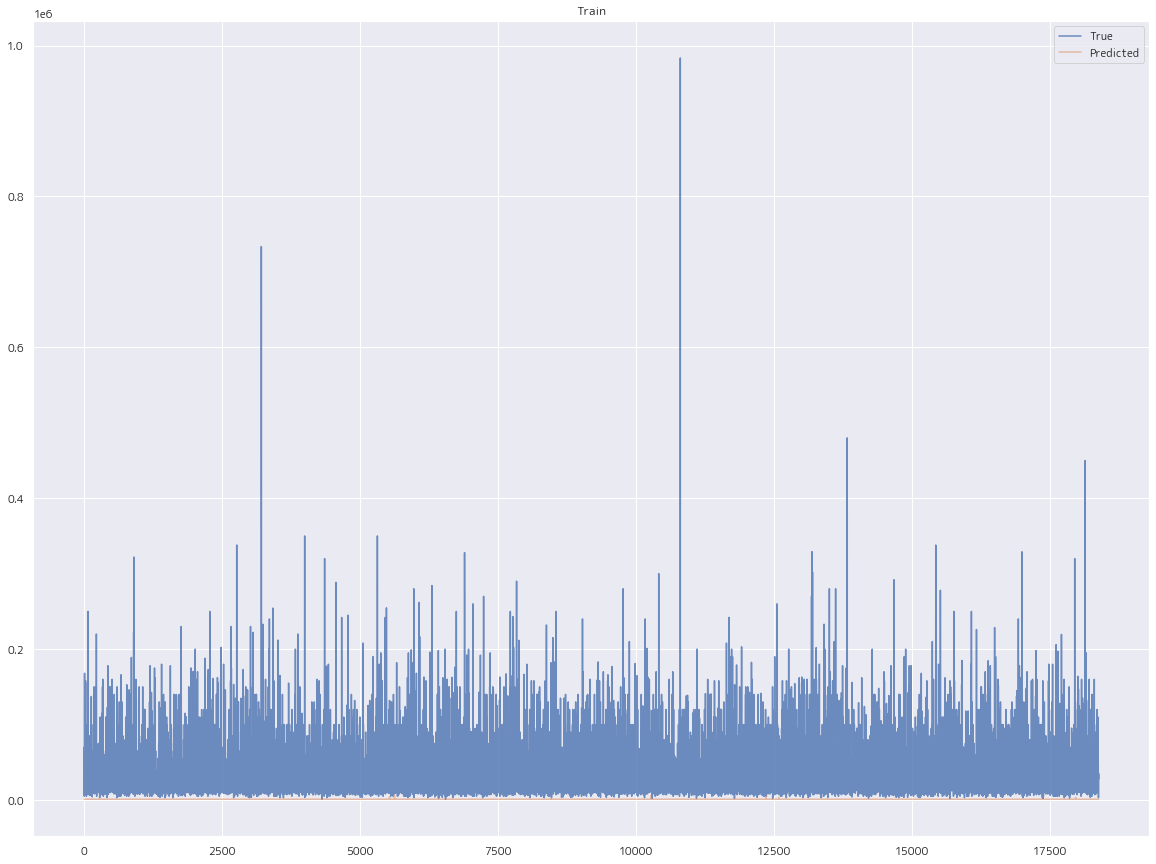

RMSE:  48244.76
MAPE:  0.9518171




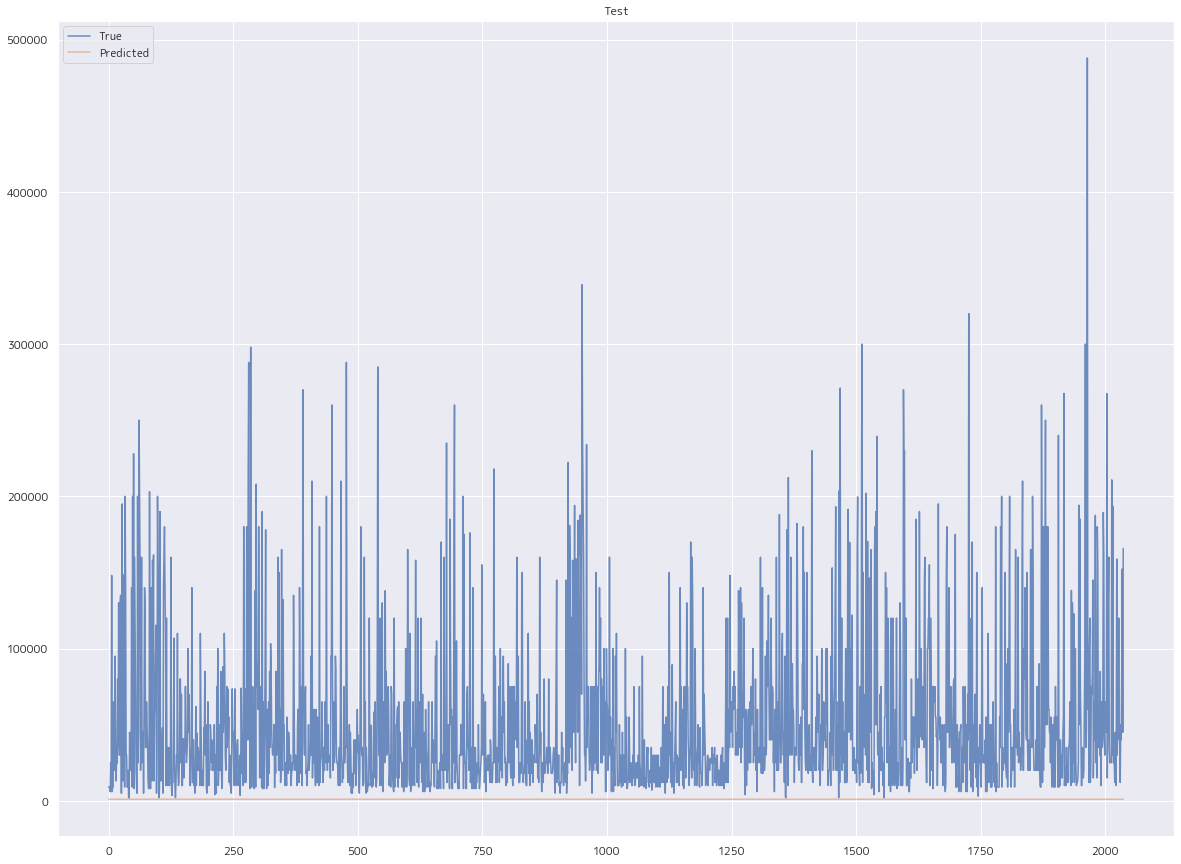

RMSE:  72977.68
MAPE:  0.9541203




In [483]:
df = df_best_feature_model.copy()

df['y-lag1'] = df['Thành tích bán ra_販売実績'].shift(1)
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.drop(['date_time'], axis = 1, inplace = True)

X = df.drop('Thành tích bán ra_販売実績', axis = 1)
X = X.values
y = df['Thành tích bán ra_販売実績'].values

# Split Train and Test data temporally
test_size = 0.1
cutoff = int(X.shape[0] * (1 - test_size))
X_train, y_train = X[ :cutoff , : ], y[ :cutoff ]
X_test, y_test = X[ cutoff: , : ], y[ cutoff: ]

print(X_test.shape)
del X, y

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_min, y_max = np.min(y_train), np.max(y_train)
y_train = (y_train - y_min) / (y_max - y_min)
y_test = (y_test - y_min) / (y_max - y_min)

len_input = 5
no_vars = X_train.shape[1]
X_train, y_train = RNN_regprep(X_train, y_train, len_input, len_pred = 1)
X_test, y_test = RNN_regprep(X_test, y_test, len_input, len_pred = 1)

RNN = Sequential([ 

LSTM(50, input_shape = (len_input, no_vars)), 

Dense(1, activation = relu)

])

#     RNN.summary()


    # Choose no. cycles, epochs, batch size
n_epochs = 7
batch_size = 70
iterations = X_train.shape[0] // batch_size

# MAE works better than MSE in the [0, 1] range
loss = tf.keras.losses.MeanAbsoluteError()

optimizer = tf.optimizers.Adam(learning_rate = 0.0005)

loss_history = []


@tf.function
def train_model_on_batch():
    start = epoch * batch_size
    X_batch = X_train[start:start+batch_size, :, :]
    y_batch = y_train[start:start+batch_size, :]

    with tf.GradientTape() as tape:
        current_loss = loss(RNN(X_batch), y_batch)
    gradients = tape.gradient(current_loss, RNN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, RNN.trainable_variables))
    return current_loss


for epoch in range(n_epochs+1):
    X_train, y_train = shuffle(X_train, y_train)

    for iteration in range(iterations):
        current_loss = train_model_on_batch()

    if epoch % 1 == 0:
        loss_history.append(current_loss.numpy())
#             print("{}.   \t\tLoss: {}".format(
#                 epoch, loss_history[-1]))

# Generate prediction on test data
P_test = RNN.predict(X_test)
P_train = RNN.predict(X_train)

# Revert scaling of y and prediction
y_train = y_train * (y_max - y_min) + y_min
P_train = P_train * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))
P_train = P_train.reshape((P_train.shape[0], P_train.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_train, label = 'True', alpha = 0.8)
plt.plot(P_train, label = 'Predicted', alpha = 0.5)
plt.title('Train')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_train, P_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train, P_train))
print("\n")


# Revert scaling of y and prediction
y_test = y_test * (y_max - y_min) + y_min
P_test = P_test * (y_max - y_min) + y_min

# Reshape to 2D for visualization
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1]))
P_test = P_test.reshape((P_test.shape[0], P_test.shape[1]))

plt.figure(figsize = (20, 15))
plt.plot(y_test, label = 'True', alpha = 0.8)
plt.plot(P_test, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

print("RMSE: ",np.sqrt(mean_squared_error(y_test, P_test)))
print("MAPE: ",mean_absolute_percentage_error(y_test, P_test))
print("\n")


RNN.save("LSTM_modelCar_customer.h5")

In [698]:
test = df_best_feature.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','Khách hàng_仕向先','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['Thành tích bán ra_販売実績'].mean().reset_index()

In [699]:
data = test.drop(columns=['Thành tích bán ra_販売実績'])
target = test['Thành tích bán ra_販売実績']

X_train, X_test, y_train, y_test = train_test_split (data, target, test_size= 0.3, random_state=42)

In [700]:
model_test = ExtraTreesRegressor()
model_test.fit(X_train, y_train)

ExtraTreesRegressor()

In [703]:
df_A32 = test[(test['Tên phụ tùng_商品名'] == 0) & (test['Model xe_車輌型式'] == 4) & (test['Engine model_エンジン型式'] == 477)].sort_values(by = ['Năm bán hàng_売上年','Tháng bán hàng_売上月'])

In [704]:
pred_A32 = model_test.predict(df_A32.drop(columns=['Thành tích bán ra_販売実績']))
mean_absolute_percentage_error(df_A32['Thành tích bán ra_販売実績'],pred_A32)

0.02021929012345679

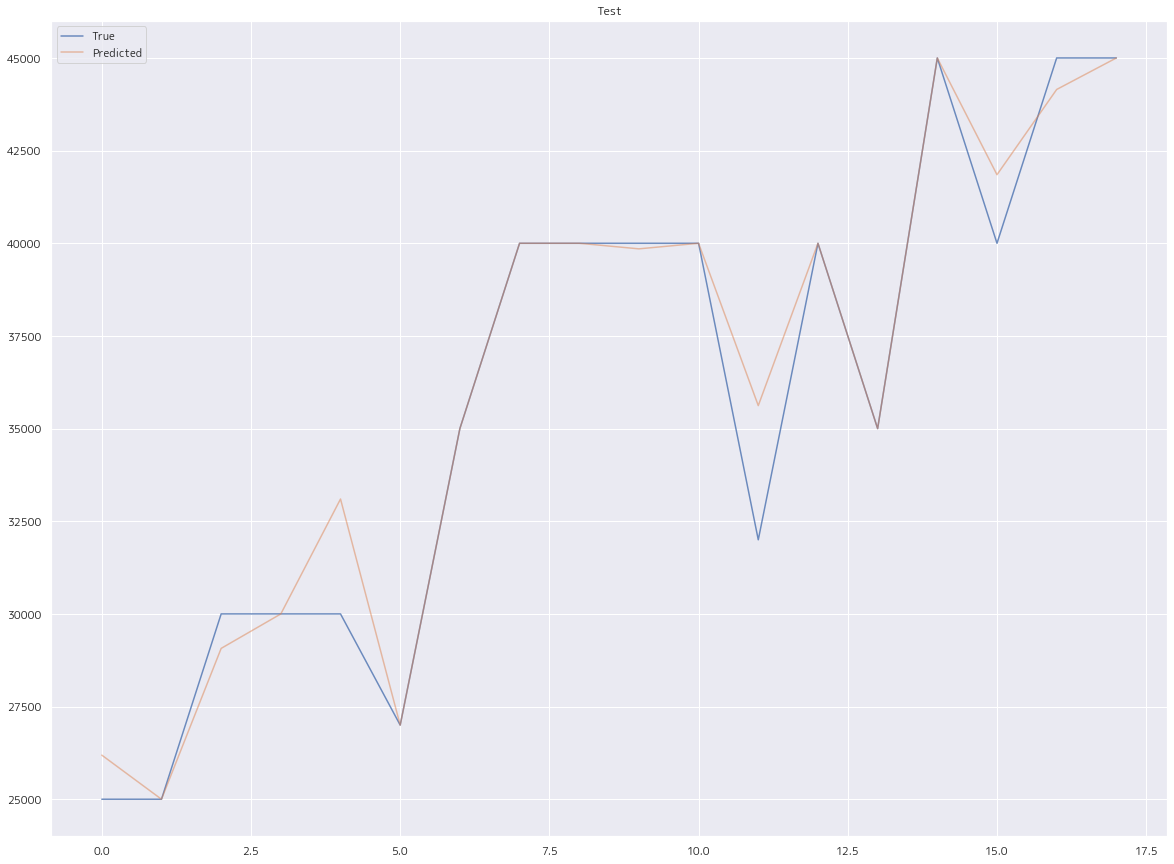

In [705]:
plt.figure(figsize = (20, 15))
plt.plot(df_A32['Thành tích bán ra_販売実績'].values, label = 'True', alpha = 0.8)
plt.plot(pred_A32, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

In [712]:
X_test_A32 = test[(test['Tên phụ tùng_商品名'] == 0) & (test['Model xe_車輌型式'] == 4) & (X_test['Engine model_エンジン型式'] == 477)].sort_values(by = ['Năm bán hàng_売上年','Tháng bán hàng_売上月'])
X_train_A32 = X_train[(X_train['Tên phụ tùng_商品名'] == 0) & (X_train['Model xe_車輌型式'] == 4) & (X_train['Engine model_エンジン型式'] == 477)].sort_values(by = ['Năm bán hàng_売上年','Tháng bán hàng_売上月'])

In [713]:
pred_test = model_test.predict(X_test_A32)

plt.figure(figsize = (20, 15))
plt.plot(y_test.values, label = 'True', alpha = 0.8)
plt.plot(pred_test, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

ValueError: X has 7 features, but ExtraTreeRegressor is expecting 6 features as input.

In [760]:
test_quantile = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['Thành tích bán ra_販売実績'].quantile(0.75).reset_index(name='quantile_75')
test_quantile['month_year'] = test_quantile['Tháng bán hàng_売上月'].astype(str) + "/"+ test_quantile['Năm bán hàng_売上年'].astype(str)
test_quantile['month_year']  = pd.to_datetime(test_quantile['month_year'], format="%m/%Y")
model_engine = test_quantile[['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','month_year']]

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,quantile_75
0,エンジン,1C8F4,CHRYSLER-T,6,2016,30000.0
1,エンジン,1GCDL19,CHEV-4G,4,2017,30000.0
2,エンジン,1GNEL19W,CHEV-4G,10,2017,35000.0
3,エンジン,A32,VQ20DE,1,2013,27000.0
4,エンジン,A32,VQ20DE,1,2017,32000.0
...,...,...,...,...,...,...
16294,Ｒアクスル（生/Ｄ）,YXS11,3Y-PE,1,2015,5000.0
16295,Ｒアクスル（生/Ｄ）,Z22A,4A90,2,2018,8000.0
16296,Ｒアクスル（生/Ｄ）,Z22A,4A90,2,2020,10000.0
16297,Ｒアクスル（生/Ｄ）,Z26A,4G19,2,2017,8000.0


In [731]:
data = df_best_feature.drop(columns=['Thành tích bán ra_販売実績'])
target = df_best_feature['Thành tích bán ra_販売実績']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=42)

In [732]:
extra_tree = ExtraTreesRegressor()
extra_tree.fit(X_train, y_train)
y_pred = extra_tree.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.10957382318488988

In [740]:
quantile_75 = pd.merge(test_quantile, df_best_feature, on =['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式','Tháng bán hàng_売上月','Năm bán hàng_売上年'],how = 'outer')


,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,quantile_75,Thành tích bán ra_販売実績,Khách hàng_仕向先,mean,mean_auction
0,0,0,226,6,2016,30000.0,30000.0,82,30000.000000,11009.000000
1,0,1,225,4,2017,30000.0,30000.0,72,30000.000000,0.000000
2,0,2,225,10,2017,35000.0,35000.0,72,35000.000000,0.000000
3,0,4,477,1,2013,27000.0,27000.0,78,38916.666667,26244.666667
4,0,4,477,1,2017,32000.0,32000.0,78,38916.666667,26244.666667
...,...,...,...,...,...,...,...,...,...,...
20423,11,1539,91,2,2018,8000.0,8000.0,7,22800.000000,12466.647059
20424,11,1539,91,2,2020,10000.0,10000.0,8,22800.000000,12466.647059
20425,11,1543,108,2,2017,8000.0,8000.0,37,20181.818182,27237.000000
20426,11,1562,55,3,2012,2500.0,2500.0,3,2500.000000,0.000000


In [741]:
y_pred = extra_tree.predict(quantile_75.drop(columns=['quantile_75','Thành tích bán ra_販売実績']))
mean_absolute_percentage_error(quantile_75['quantile_75'], y_pred)


0.29445457094249167

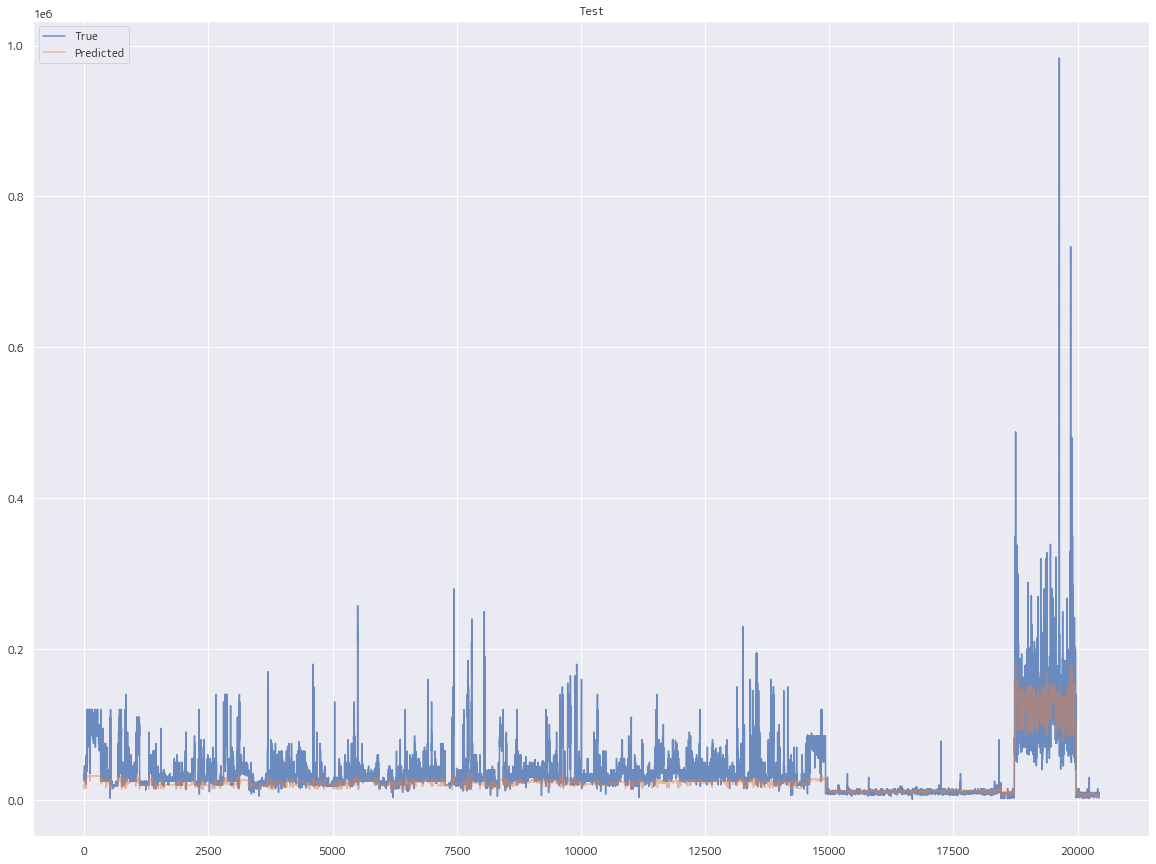

In [744]:
plt.figure(figsize = (20, 15))
plt.plot(quantile_75['quantile_75'], label = 'True', alpha = 0.8)
plt.plot(y_pred, label = 'Predicted', alpha = 0.5)
plt.title('Test')
plt.legend()
plt.show()

In [745]:
n = 100
table = [[0]*n for x in range(n)]
array1 = [[0] for i in range(n)]
mini = array1[1] + table[1][1]

TypeError: can only concatenate list (not "int") to list

In [758]:
test = pickle.load(open("test_mean/engineModel_by_month.pkl","rb"))
test

,Engine model_エンジン型式,Thành tích bán ra_販売実績,month_year
0,13B,15000.0,2019-02-01
1,1AZ-FSE,38000.0,2016-01-01
2,1AZ-FSE,10000.0,2017-01-01
3,1AZ-FSE,15000.0,2018-01-01
4,1AZ-FSE,8000.0,2019-01-01
...,...,...,...
9408,ZY-VE,25000.0,2018-12-01
9409,ZY-VE,28000.0,2020-12-01
9410,unknown,12000.0,2017-01-01
9411,unknown,150000.0,2015-07-01


In [759]:
df.groupby(['Engine model_エンジン型式','Khách hàng_仕向先','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['Thành tích bán ra_販売実績'].mean().reset_index()

,Engine model_エンジン型式,Khách hàng_仕向先,Tháng bán hàng_売上月,Năm bán hàng_売上年,Thành tích bán ra_販売実績
0,13B,㈱パシフィック・トレーディング・インターナショナル,2,2019,15000.0
1,1AZ-FSE,ATC ALYANS,5,2012,12000.0
2,1AZ-FSE,AUTOHELP,4,2017,40000.0
3,1AZ-FSE,AUTOHELP,9,2020,16375.0
4,1AZ-FSE,AVTOTAUN+ CO LTD,2,2018,38000.0
...,...,...,...,...,...
13259,ZY-VE,木戸クンク・ジャイブ,11,2015,12000.0
13260,ZY-VE,西野 仮予約,4,2013,30000.0
13261,ZY-VE,西野 仮予約,8,2013,30000.0
13262,ZY-VE,高崎 仮予約 １,3,2019,7000.0


In [769]:
test = df_best_feature[(df_best_feature['Model xe_車輌型式'] == 535) & (df_best_feature['Tháng bán hàng_売上月'] == 1) & (df_best_feature['Năm bán hàng_売上年'] == 2012)]
test['Tên phụ tùng_商品名'] = acc_encode.inverse_transform(test['Tên phụ tùng_商品名'])
test['Model xe_車輌型式'] = model_encode.inverse_transform(test['Model xe_車輌型式'])
test['Engine model_エンジン型式'] =  engine_encode.inverse_transform(test['Engine model_エンジン型式'])
test

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Thành tích bán ra_販売実績,Khách hàng_仕向先,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年
2867,ノーズカット（個別）,GX100,1G-FE,10000.0,3,1,34199.526316,28584.1,2012
2874,ノーズカット（個別）,GX100,1G-FE,12000.0,0,1,34199.526316,28584.1,2012
2877,エンジン,GX100,1G-FE,28000.0,73,1,34199.526316,28584.1,2012
2879,エンジン,GX100,1G-FE,35000.0,23,1,34199.526316,28584.1,2012


In [791]:
df_best_feature[df_best_feature['Engine model_エンジン型式'] == '1AZ-FSE'].drop(columns= ['mean','mean_auction']).describe()

,Thành tích bán ra_販売実績,Tháng bán hàng_売上月,Năm bán hàng_売上年
count,244.000000,244.000000,244.000000
mean,42361.459016,6.319672,2017.303279
std,45791.129192,3.144703,2.489118
min,8000.000000,1.000000,2012.000000
25%,15000.000000,4.000000,2016.000000
50%,38000.000000,6.000000,2018.000000
75%,40000.000000,9.000000,2019.000000
max,350000.000000,12.000000,2021.000000


In [804]:
df_best_feature.rename(columns={'Tên phụ tùng_商品名':'part','Model xe_車輌型式':'vehicle_model','Engine model_エンジン型式':'engine_model','Thành tích bán ra_販売実績':'price','Khách hàng_仕向先':'customer'},inplace=True)

In [805]:
df_best_feature

,part,vehicle_model,engine_model,price,customer,Tháng bán hàng_売上月,mean,mean_auction,Năm bán hàng_売上年
0,ノーズカット（個別）,ES9,LDA-MF5,12000.0,SARRANSINGH'S AUTO LTD,3,12000.000000,NaN,2016
1,エンジン,AT211,7A-FE,30000.0,木戸クンク・ジャイブ,2,39556.053812,50511.400000,2015
2,ノーズカット（個別）,AT211,7A-FE,10000.0,木戸クンク・ジャイブ,2,39556.053812,50511.400000,2015
3,エンジン,AT211,7A-FE,30000.0,NaN,8,39556.053812,50511.400000,2015
4,エンジン,AT211,7A-FE,33000.0,NaN,7,39556.053812,50511.400000,2015
...,...,...,...,...,...,...,...,...,...
20423,エンジン,JLR50,VG33E,40000.0,西野 仮予約,2,40000.000000,2000.000000,2013
20424,Ｆアクスル（生/Ｄ）,SKF2V,RF-T EFI,3500.0,FADEEV EVGENY,5,3500.000000,40017.000000,2020
20425,フロントアクスル（個別）,SKF2MN,RF,2000.0,木戸クンク・ジャイブ,3,3500.000000,39032.833333,2019
20426,Ｒアクスル（生/Ｄ）,SKF2MN,RF,5000.0,木戸クンク・ジャイブ,3,3500.000000,39032.833333,2019


In [809]:
a = df_best_feature.groupby(['part','engine_model','customer','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['price'].mean().reset_index()
b = df_best_feature.groupby(['part','vehicle_model','customer','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['price'].mean().reset_index()
c = df_best_feature.groupby(['part','vehicle_model','engine_model','customer','Tháng bán hàng_売上月','Năm bán hàng_売上年'])['price'].mean().reset_index()

a['date'] = a['Tháng bán hàng_売上月'].astype(str) + "/"+ a['Năm bán hàng_売上年'].astype(str)
a['date']  = pd.to_datetime(a['date'], format="%m/%Y")
a = a[['date','part','engine_model','price']]

b['date'] = b['Tháng bán hàng_売上月'].astype(str) + "/"+ b['Năm bán hàng_売上年'].astype(str)
b['date']  = pd.to_datetime(b['date'], format="%m/%Y")
b = b[['date','part','vehicle_model','price']]

c['date'] = c['Tháng bán hàng_売上月'].astype(str) + "/"+ c['Năm bán hàng_売上年'].astype(str)
c['date']  = pd.to_datetime(c['date'], format="%m/%Y")
c = c[['date','part','vehicle_model','engine_model','price']]

# a.to_csv("test_mean/mean_engineModel_customer_by_month.csv",index=False)
# b.to_csv("test_mean/mean_modelCar_customer_by_month.csv",index=False)
# c.to_csv("test_mean/mean_modelCar_engineModel_customer_by_month.csv",index = False)

pickle.dump(a,open("test_mean/mean_engineModel_customer_by_month.pkl","wb"))
pickle.dump(b,open("test_mean/mean_modelCar_customer_by_month.pkl","wb"))
pickle.dump(c,open("test_mean/mean_modelCar_engineModel_customer_by_month.pkl","wb"))

,date,part,engine_model,price
0,2016-01-01,エンジン,1AZ-FSE,38000.0
1,2020-01-01,エンジン,1AZ-FSE,38000.0
2,2021-01-01,エンジン,1AZ-FSE,55000.0
3,2013-02-01,エンジン,1AZ-FSE,60000.0
4,2018-02-01,エンジン,1AZ-FSE,38000.0
...,...,...,...,...
11956,2018-01-01,Ｒアクスル（生/Ｄ）,ZD30DD,10000.0
11957,2019-03-01,Ｒアクスル（生/Ｄ）,ZD30DD,9000.0
11958,2020-08-01,Ｒアクスル（生/Ｄ）,ZD30DDTI,10000.0
11959,2017-12-01,Ｒアクスル（生/Ｄ）,ZD30DDTI,5000.0


In [822]:
test1 = pickle.load(open("E:\Projects\mean_median\mean_engineModel_by_month.pkl","rb"))
test1[test1['Engine model_エンジン型式']  == '1AZ-FSE'].sort_values(by = ['Năm bán hàng_売上年','Tháng bán hàng_売上月']).head(20)

,Tên phụ tùng_商品名,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,Thành tích bán ra_販売実績
7786,ノーズカット（個別）,1AZ-FSE,5,2012,12000.0
33,エンジン,1AZ-FSE,7,2012,60000.0
7795,ノーズカット（個別）,1AZ-FSE,7,2012,10000.0
50,エンジン,1AZ-FSE,10,2012,60000.0
7805,ノーズカット（個別）,1AZ-FSE,10,2012,10000.0
7809,ノーズカット（個別）,1AZ-FSE,11,2012,10000.0
3,エンジン,1AZ-FSE,2,2013,60000.0
6,エンジン,1AZ-FSE,3,2013,54000.0
11,エンジン,1AZ-FSE,4,2013,60000.0
19,エンジン,1AZ-FSE,5,2013,60000.0


In [823]:
test = pickle.load(open("E:\Projects\mean_median\median_engineModel_by_month.pkl","rb"))

test[test['Engine model_エンジン型式']  == '1AZ-FSE'].sort_values(by = ['Năm bán hàng_売上年','Tháng bán hàng_売上月']).head(20)

,Tên phụ tùng_商品名,Engine model_エンジン型式,Tháng bán hàng_売上月,Năm bán hàng_売上年,Thành tích bán ra_販売実績
7786,ノーズカット（個別）,1AZ-FSE,5,2012,12000.0
33,エンジン,1AZ-FSE,7,2012,60000.0
7795,ノーズカット（個別）,1AZ-FSE,7,2012,10000.0
50,エンジン,1AZ-FSE,10,2012,60000.0
7805,ノーズカット（個別）,1AZ-FSE,10,2012,10000.0
7809,ノーズカット（個別）,1AZ-FSE,11,2012,10000.0
3,エンジン,1AZ-FSE,2,2013,60000.0
6,エンジン,1AZ-FSE,3,2013,54000.0
11,エンジン,1AZ-FSE,4,2013,60000.0
19,エンジン,1AZ-FSE,5,2013,60000.0


In [30]:
def transform(df):
    for col in df.columns[df.dtypes == object]:
        print(col, df[col].nunique())
        df[col] = df[col].fillna("unknown")
        df[col] = le.fit_transform(df[col].values)

    for col in df.columns[df.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
        df.fillna(0, inplace=True)

In [31]:
def test():
   df = df_best_feature.copy()
   transform(df)
   print(df)

In [32]:
def inc(a):
    a =  a + 1
#     print(a)
    return a

In [33]:
test()

Tên phụ tùng_商品名 12
Model xe_車輌型式 1587
Engine model_エンジン型式 536
Khách hàng_仕向先 102
       Tên phụ tùng_商品名  Model xe_車輌型式  Engine model_エンジン型式  \
0                     1            370                  386   
1                     0             73                  156   
2                     1             73                  156   
3                     0             73                  156   
4                     0             73                  156   
...                 ...            ...                  ...   
20423                 0            655                  463   
20424                10           1177                  438   
20425                 3           1175                  436   
20426                11           1175                  436   
20427                10            968                  114   

       Thành tích bán ra_販売実績  Khách hàng_仕向先  Tháng bán hàng_売上月  \
0                     12000.0              65                   3   
1                     3